In [ ]:
import os
os.environ["_DEBUG"] = "1"
os.environ["_MULTIPROCESS"] = "0"

# Star notation allows importing type hints for kedro variables (catalog, pipeline, etc)
# along with the register_kedro function.
from pasteur.kedro.ipython import *
from pasteur.utils.styles import use_style

# Import data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add autoreload to allow iterating on your modules
%load_ext line_profiler
%load_ext autoreload
%autoreload 2

# Register your kedro project to access the catalog
register_kedro()
use_style('mlflow')

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
INFO     Kedro project Pasteur Testing Project                                                                          __init__.py:108
INFO     Defined global variable 'context', 'session', 'catalog' and 'pipelines'                                        __init__.py:109
INFO     Registered line magic 'run_viz'                                                                                __init__.py:115


In [ ]:
m = catalog.load("mimic_tab_admissions.privbayes.model")

In [ ]:
from itertools import combinations

import networkx as nx

from pasteur.graph.base import to_moral, find_elim_order, elimination_order_greedy
from pasteur.graph.utils import enchanced_display
from pasteur.extras.synth.privbayes import derive_graph_from_nodes

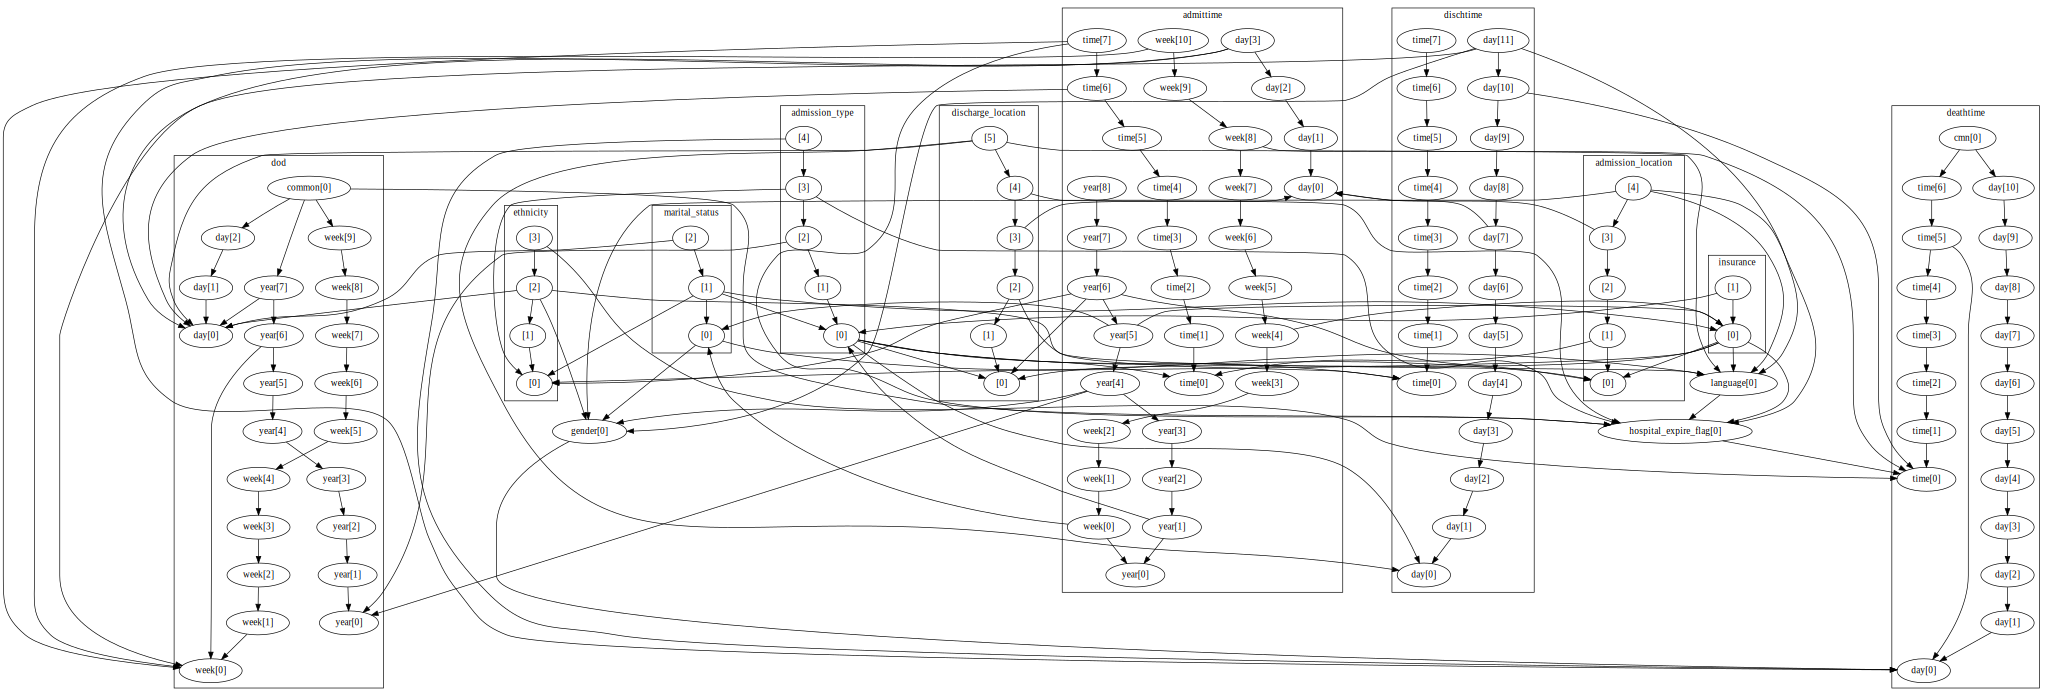

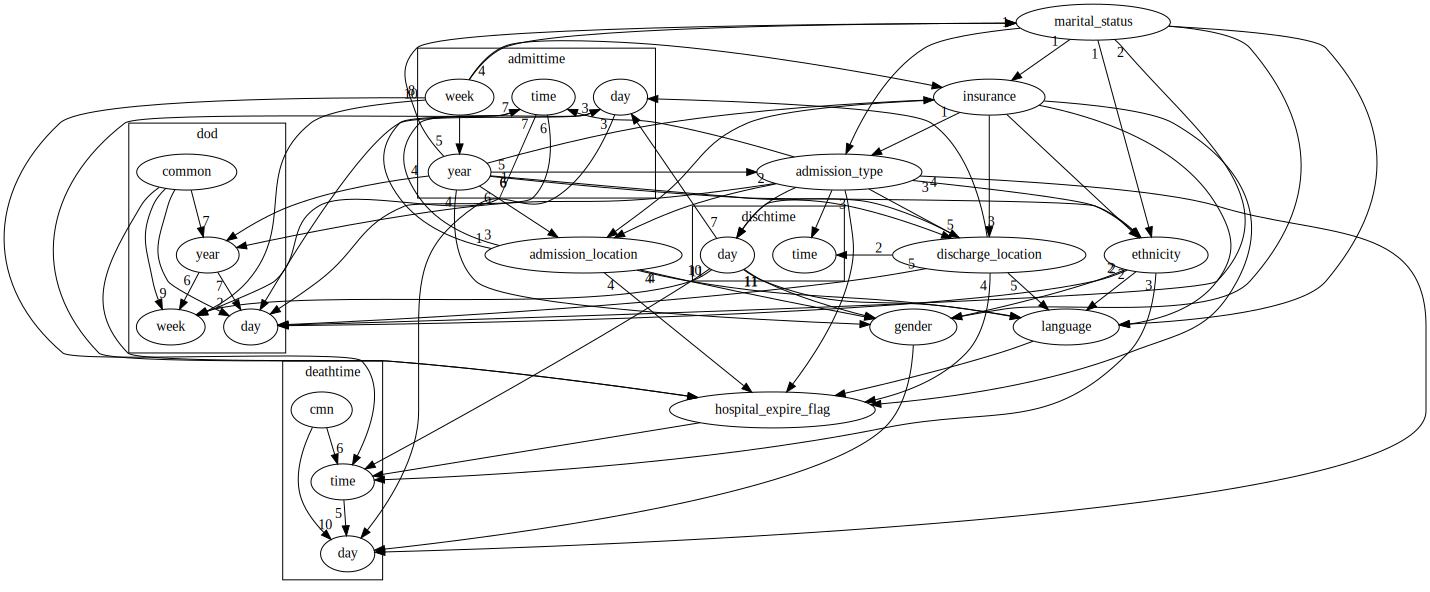

In [ ]:
g = derive_graph_from_nodes(m.nodes, m.table_attrs, prune=False)

enchanced_display(g, False)
enchanced_display(g)

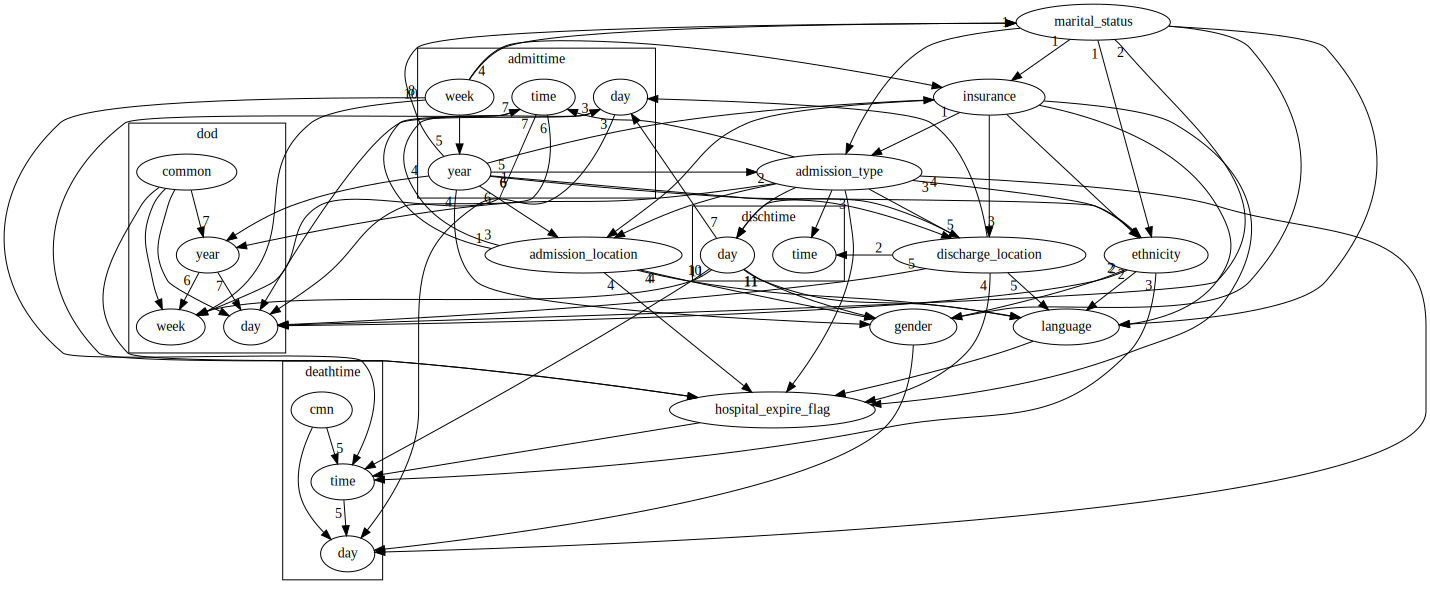

In [ ]:
g = derive_graph_from_nodes(m.nodes, m.table_attrs, prune=True)

enchanced_display(g)

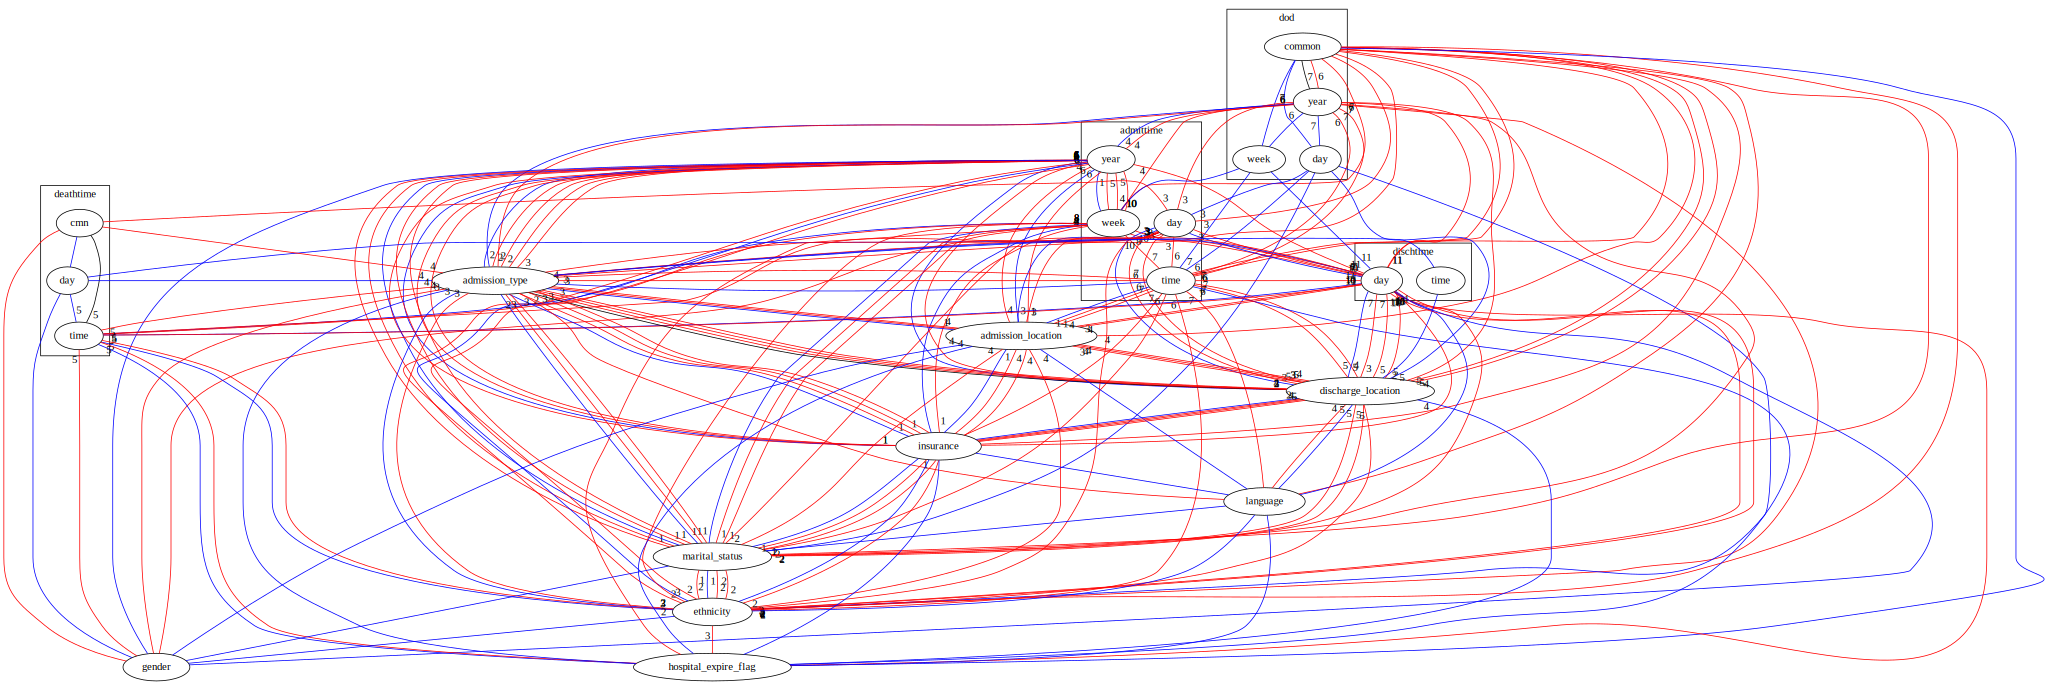

In [ ]:
mg = to_moral(g)
enchanced_display(mg)

In [ ]:
find_elim_order(mg, m.table_attrs, 10)


(
    [
        'dod.dod_year[7]',
        'admittime.admittime_time[0]',
        'discharge_location.discharge_location[0]',
        'ethnicity.ethnicity[0]',
        'admission_location.admission_location[3]',
        'dischtime.dischtime_time[0]',
        'admittime.admittime_year[5]',
        'dischtime.dischtime_day[10]',
        'deathtime.deathtime_cmn[0]',
        'discharge_location.discharge_location[2]',
        'admittime.admittime_week[10]',
        'discharge_location.discharge_location[4]',
        'dischtime.dischtime_day[0]',
        'admittime.admittime_year[0]',
        'dod.dod_year[0]',
        'admission_location.admission_location[0]',
        'deathtime.deathtime_time[0]',
        'dod.dod_day[0]',
        'marital_status.marital_status[2]',
        'deathtime.deathtime_day[0]',
        'deathtime.deathtime_time[5]',
        'admission_type.admission_type[4]',
        'dod.dod_week[0]',
        'admission_type.admission_type[2]',
        'admittime.admittime_da

In [ ]:
# %lprun -f elimination_order_greedy elimination_order_greedy(to_moral(g), m.table_attrs)

In [ ]:
%timeit elimination_order_greedy(to_moral(g), m.table_attrs)

219 ms ± 7.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


INFO     Removing node `dischtime.dischtime_day[0]` with cost: 1_152                                                         base.py:98


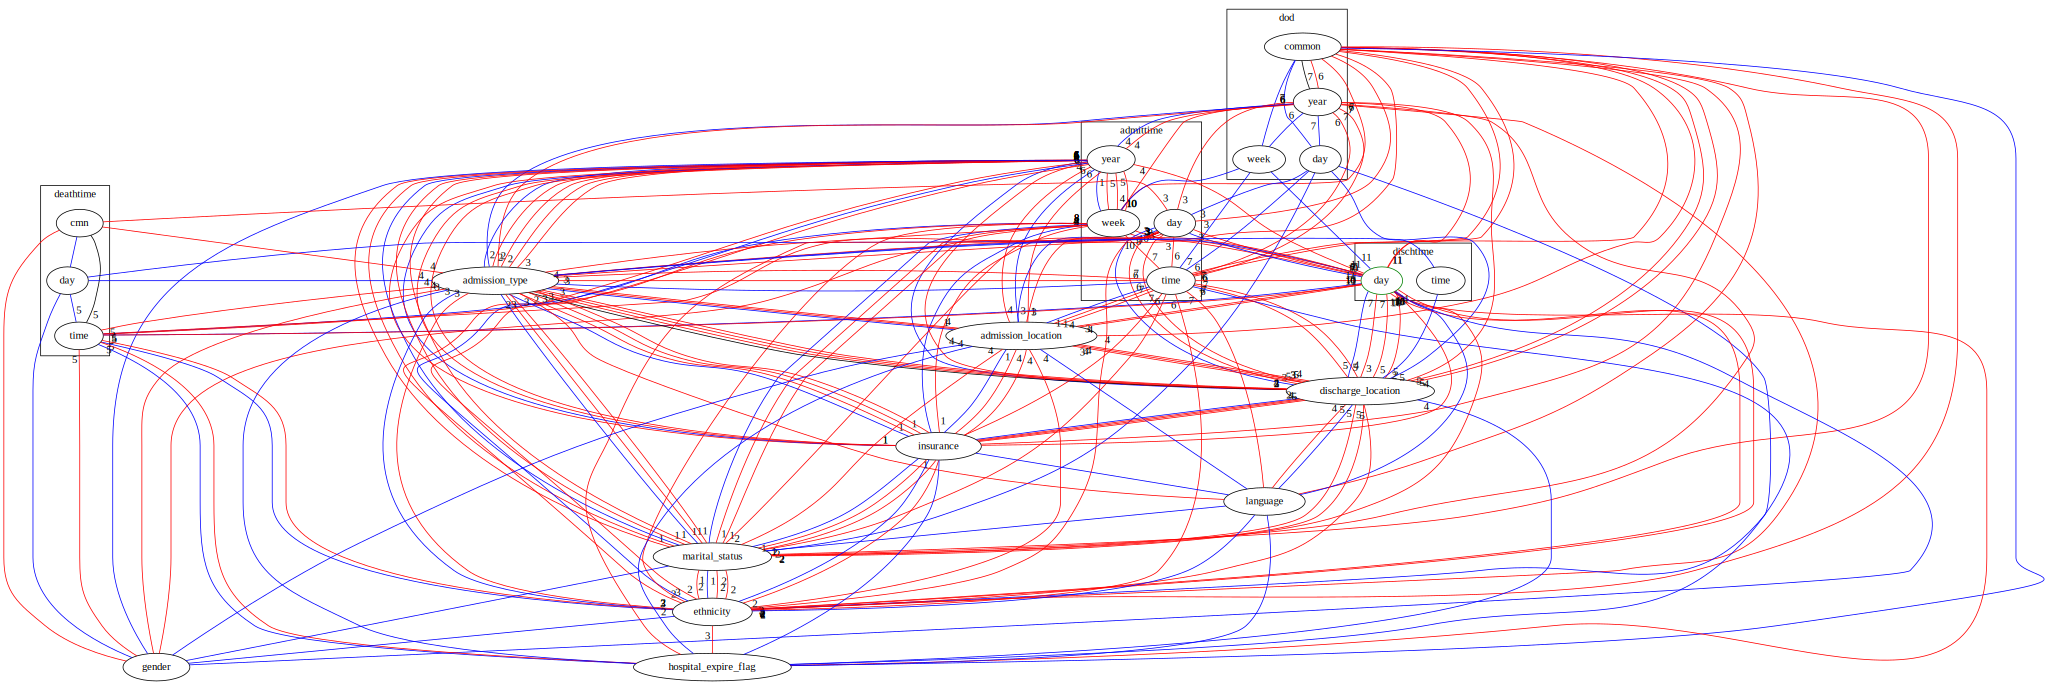

INFO     Removing node `admission_location.admission_location[0]` with cost: 1_620                                           base.py:98


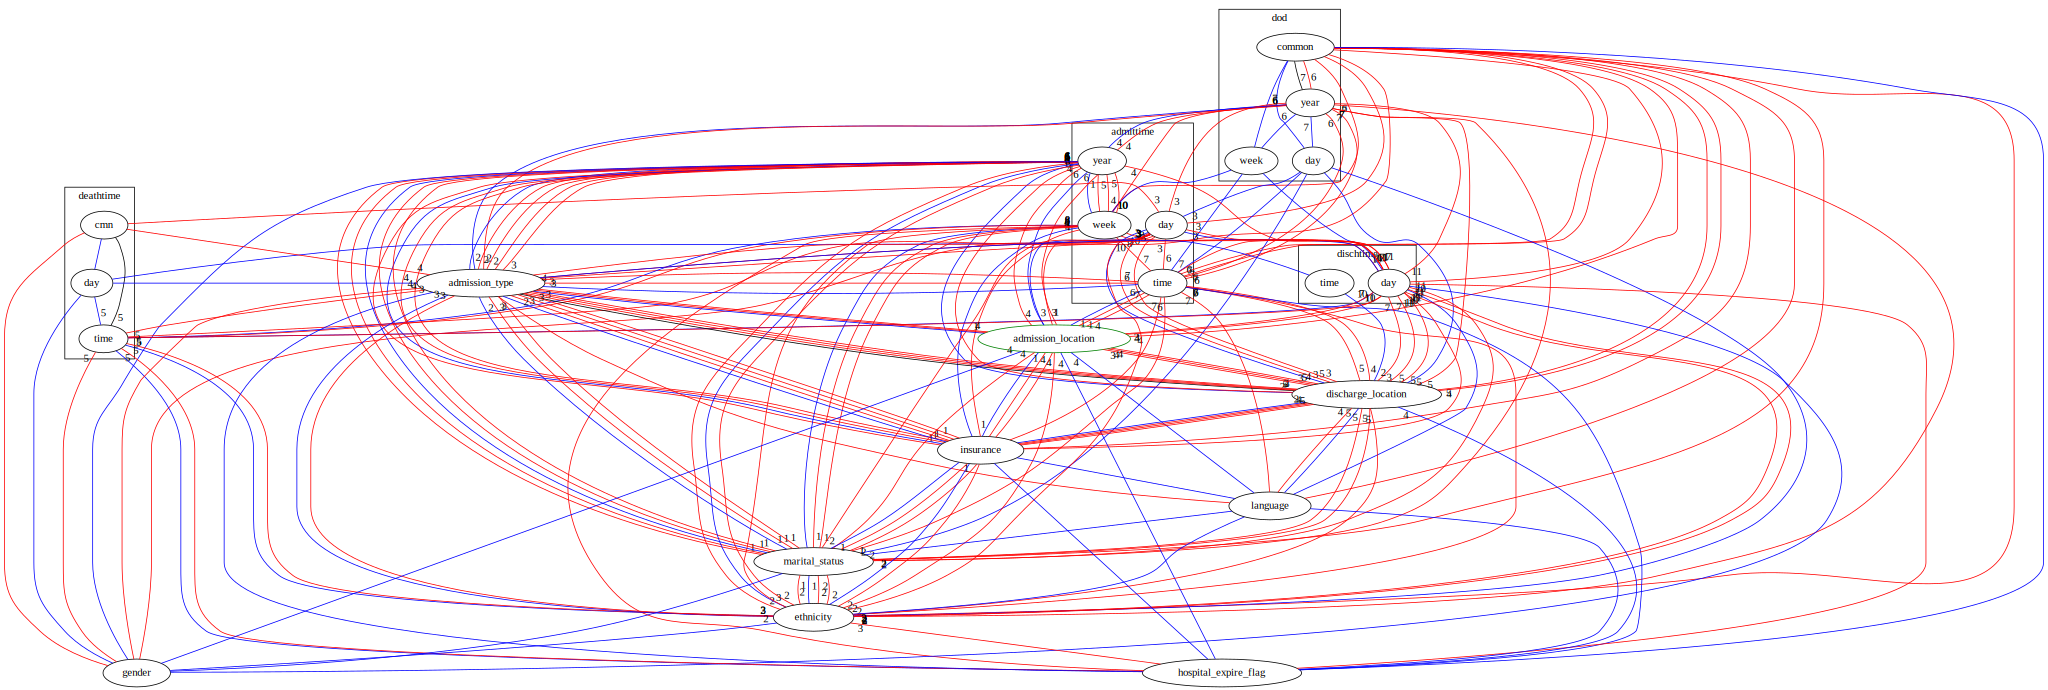

INFO     Removing node `admittime.admittime_year[0]` with cost: 1_664                                                        base.py:98


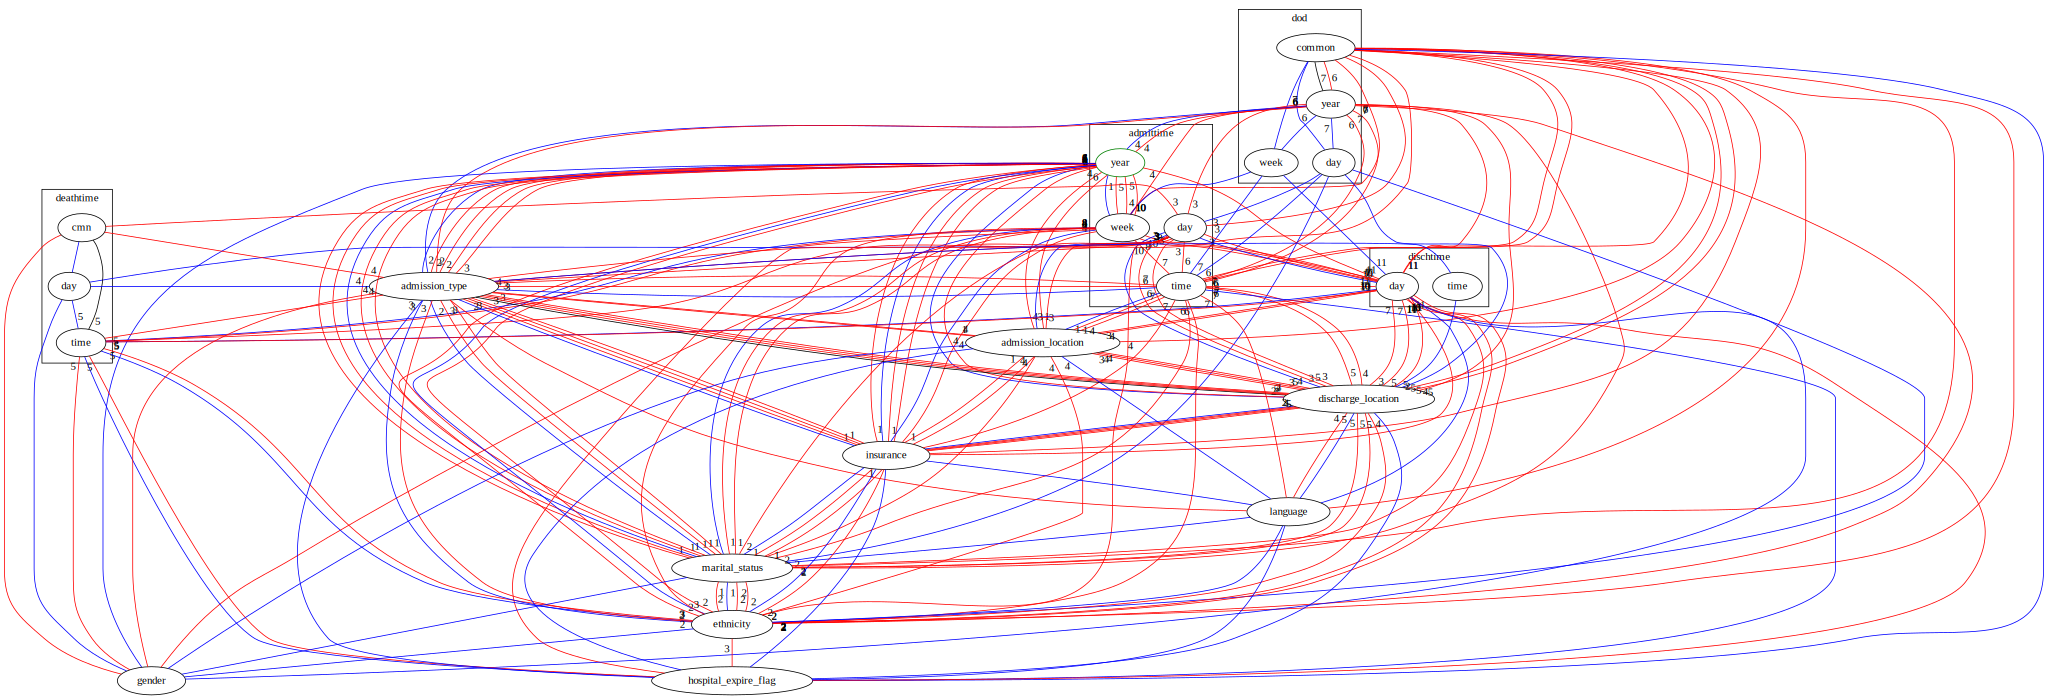

INFO     Removing node `dod.dod_week[0]` with cost: 1_672                                                                    base.py:98


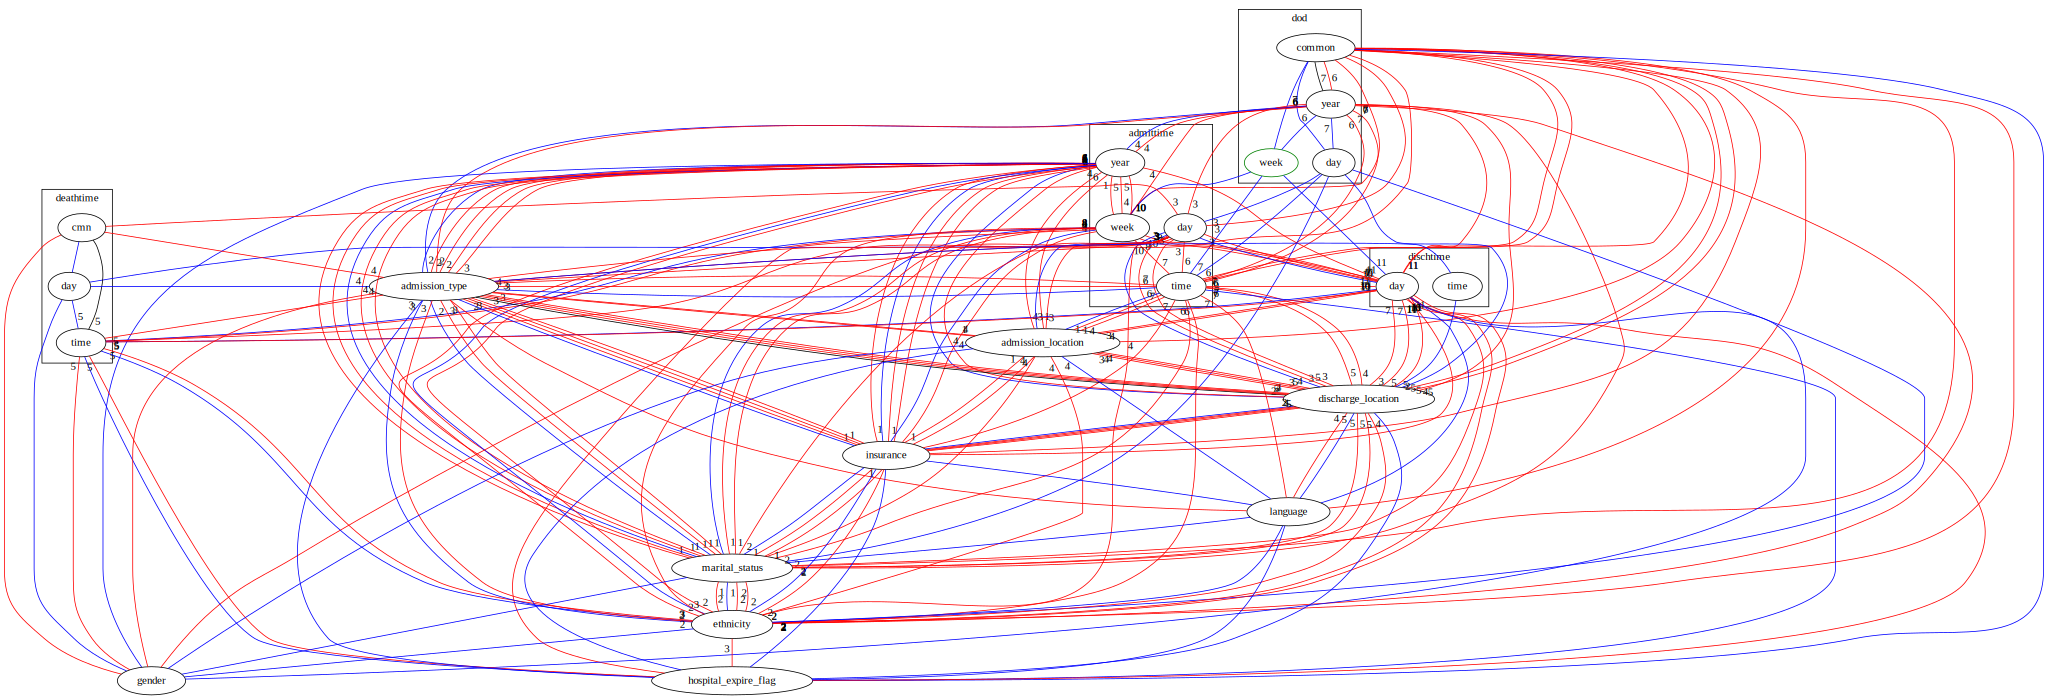

INFO     Removing node `admittime.admittime_week[10]` with cost: 100                                                         base.py:98


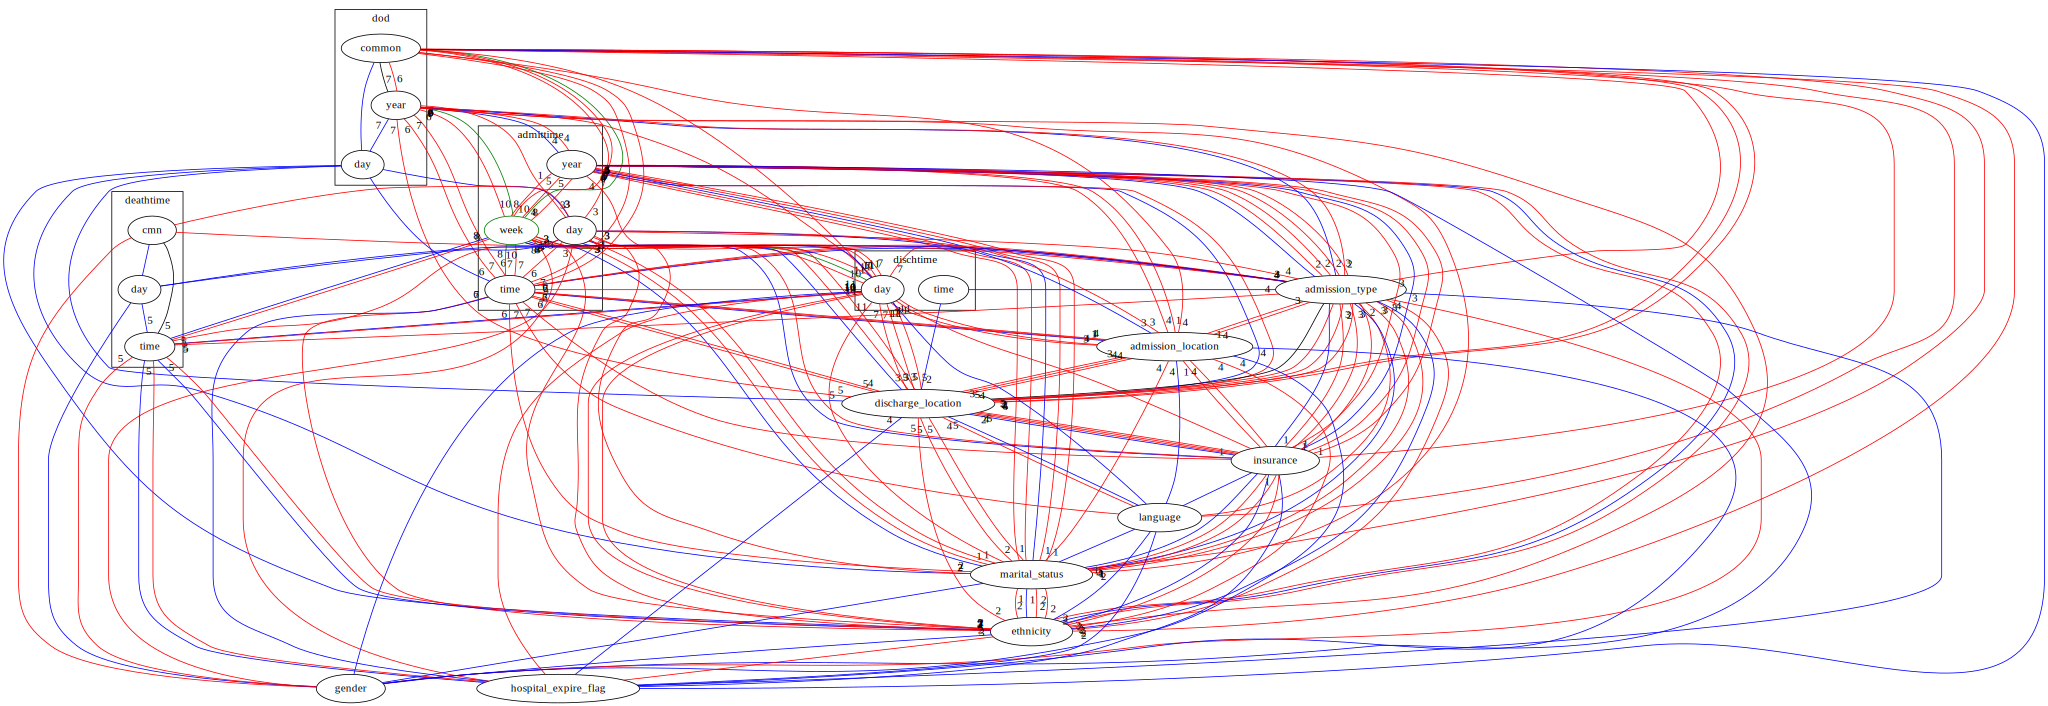

INFO     Removing node `admittime.admittime_day[0]` with cost: 1_680                                                         base.py:98


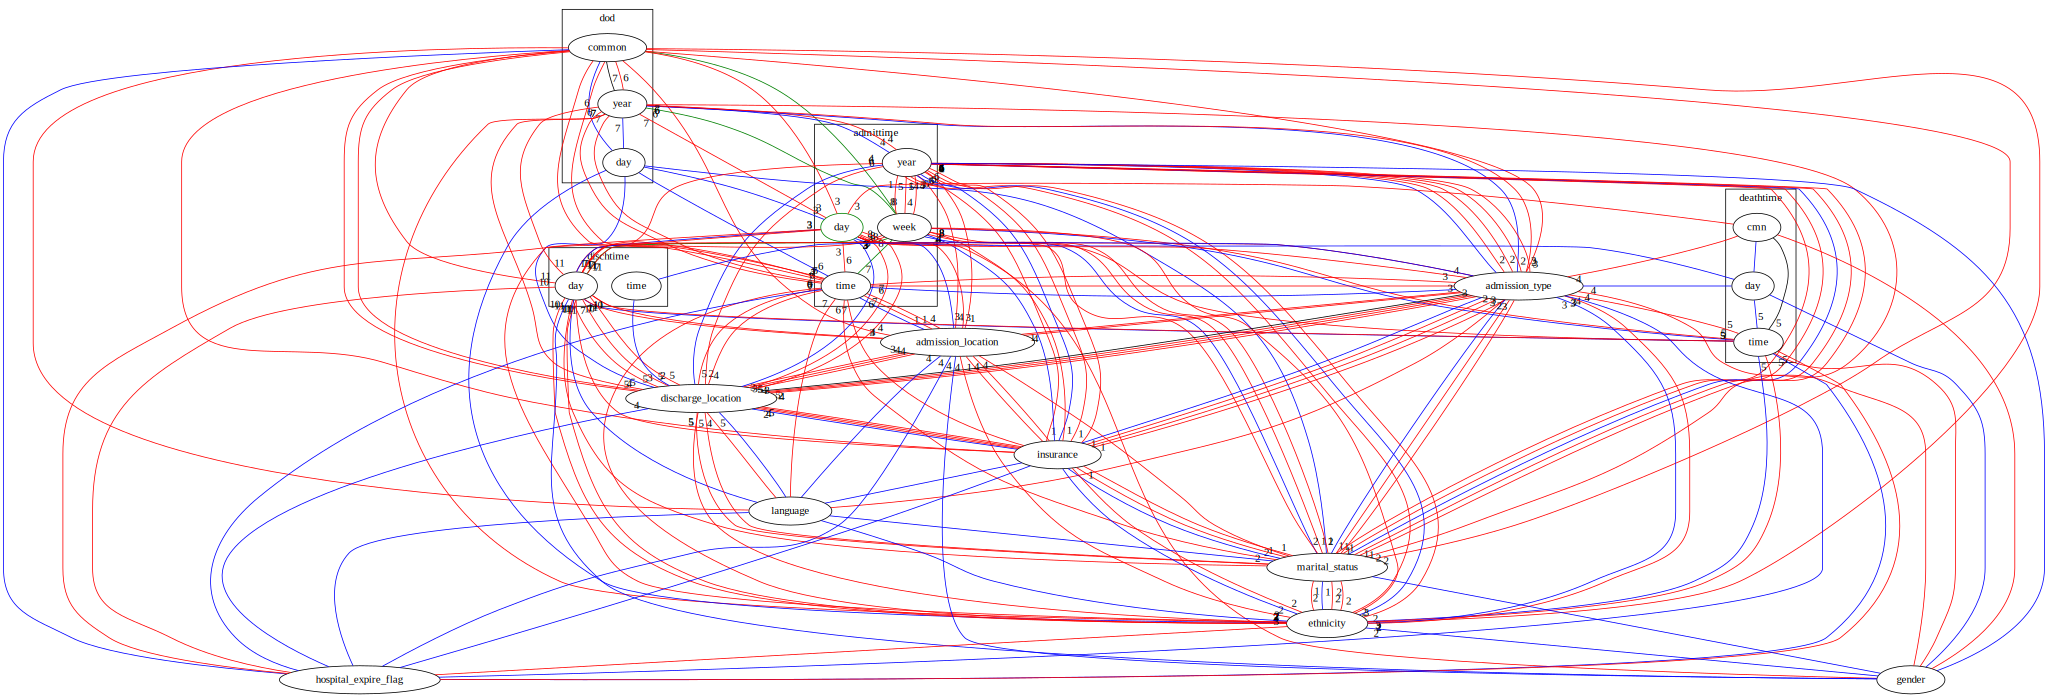

INFO     Removing node `discharge_location.discharge_location[3]` with cost: 768                                             base.py:98


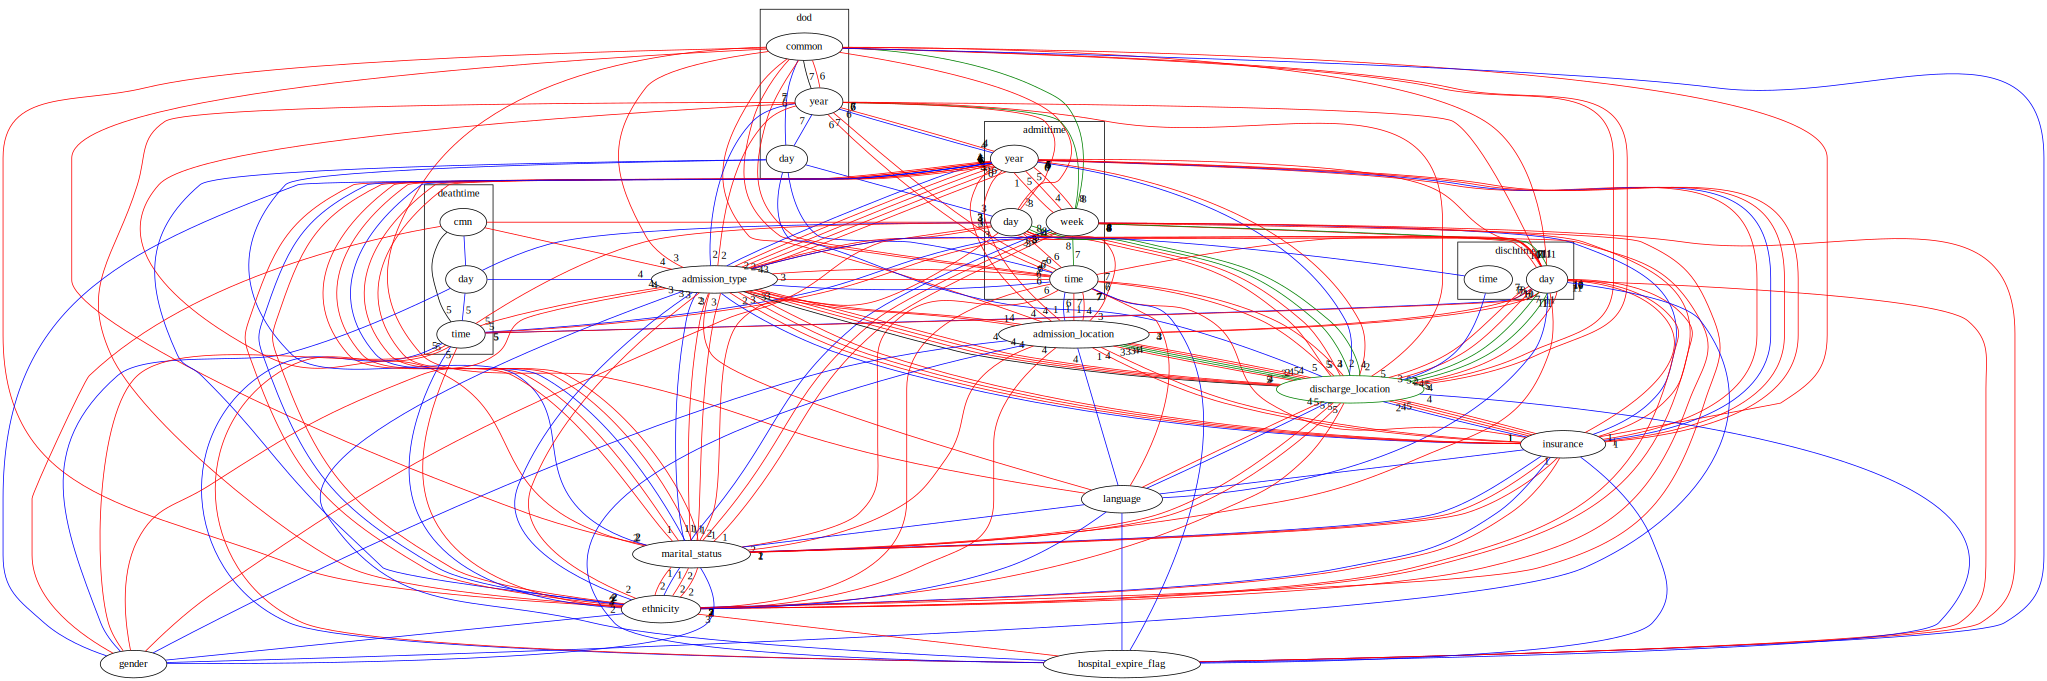

INFO     Removing node `admission_location.admission_location[3]` with cost: 1_536                                           base.py:98


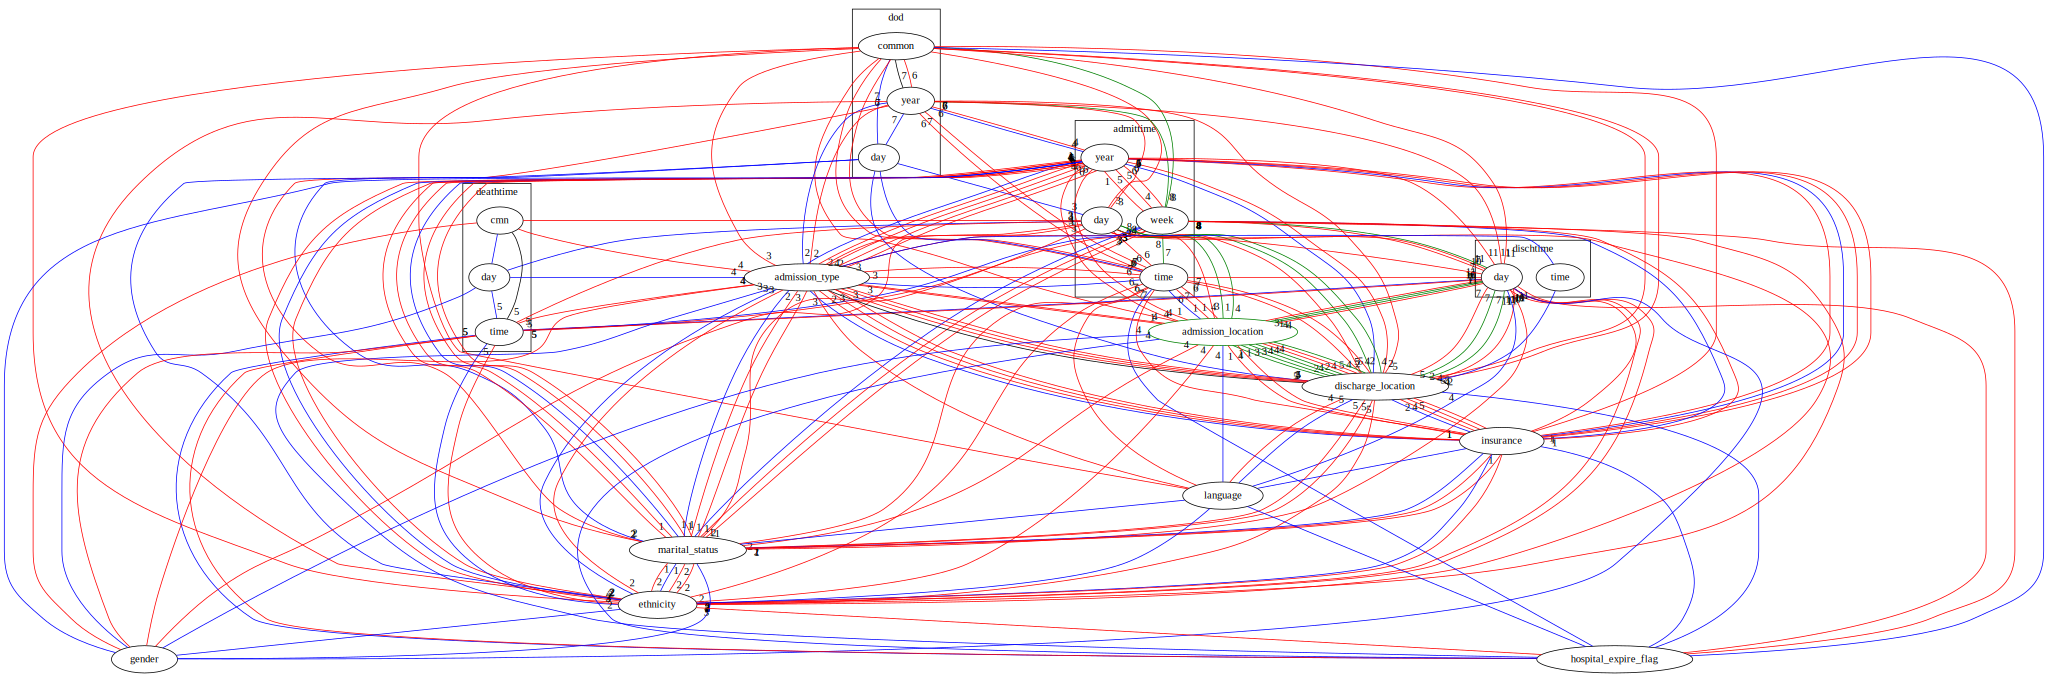

INFO     Removing node `admittime.admittime_time[0]` with cost: 1_728                                                        base.py:98


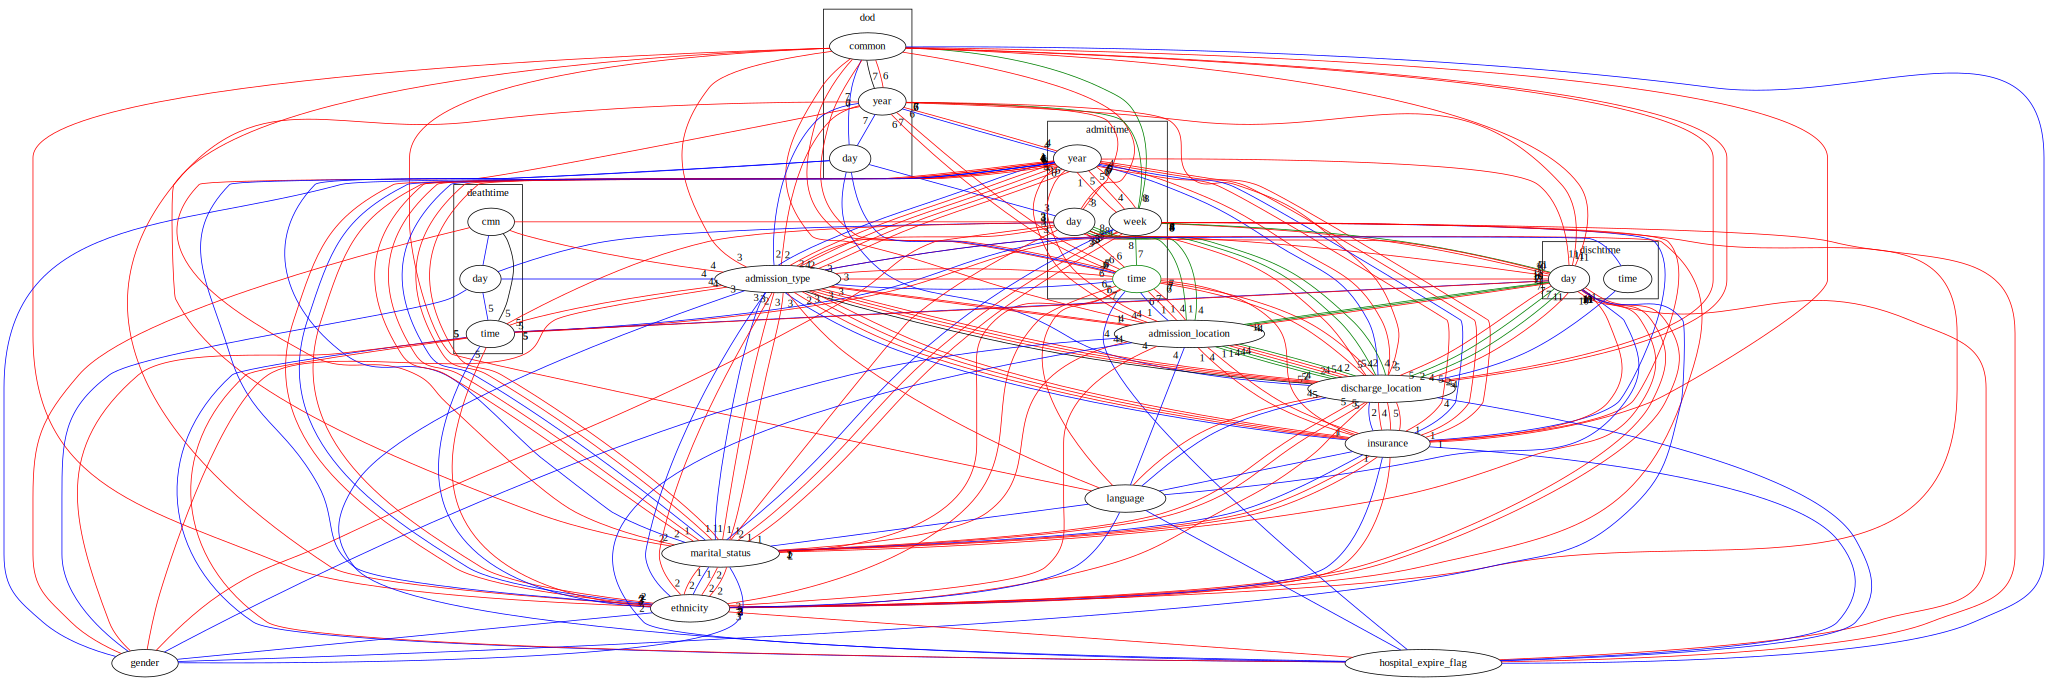

INFO     Removing node `dischtime.dischtime_time[0]` with cost: 1_728                                                        base.py:98


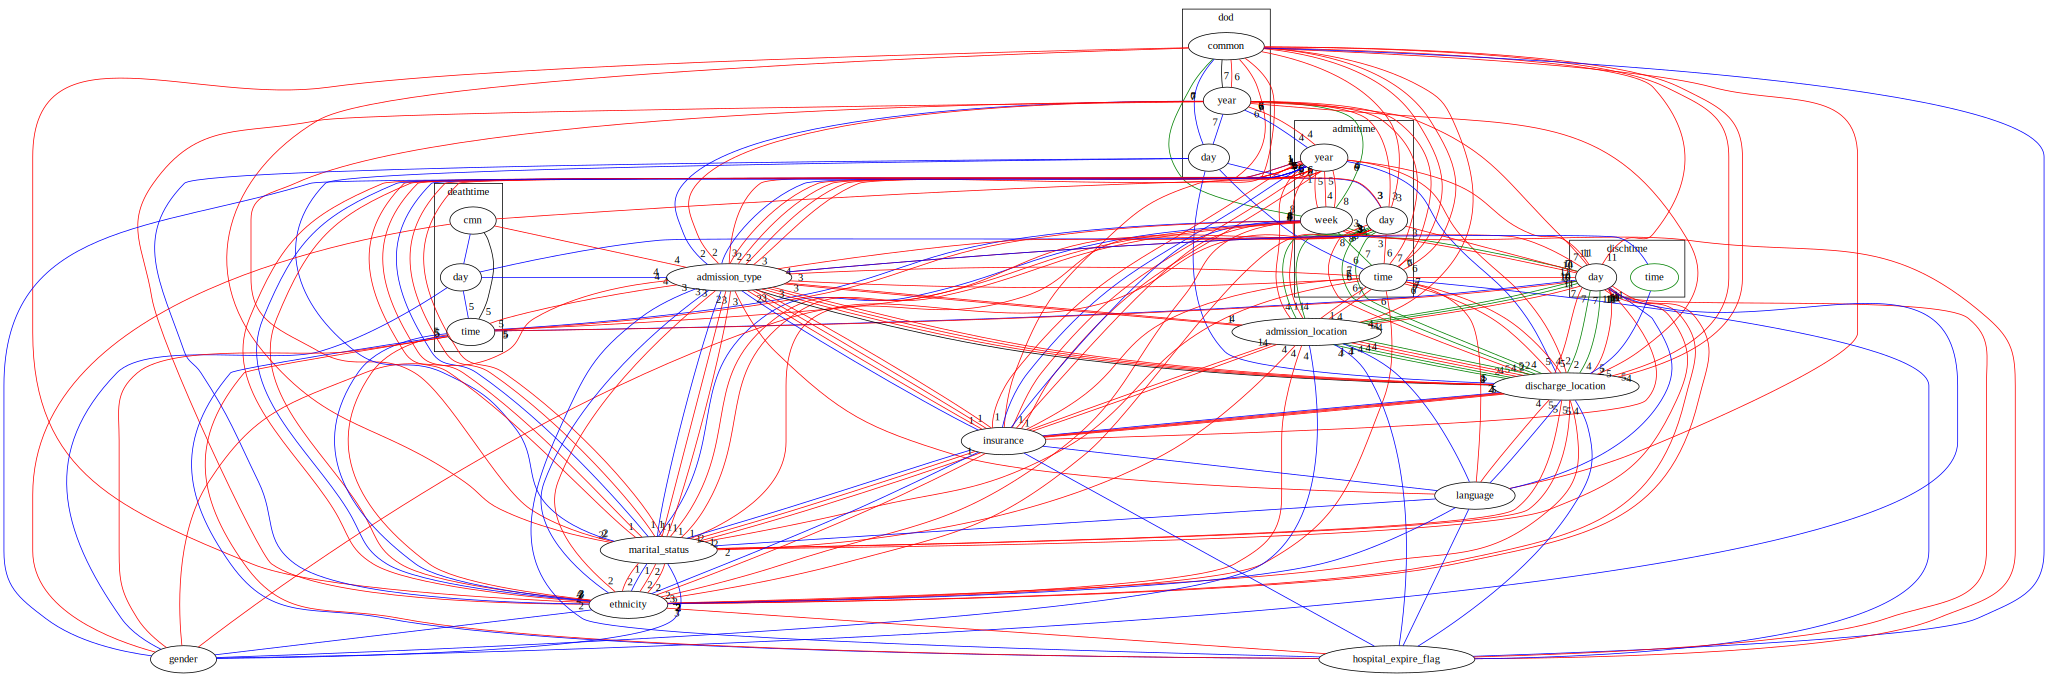

INFO     Removing node `discharge_location.discharge_location[0]` with cost: 1_890                                           base.py:98


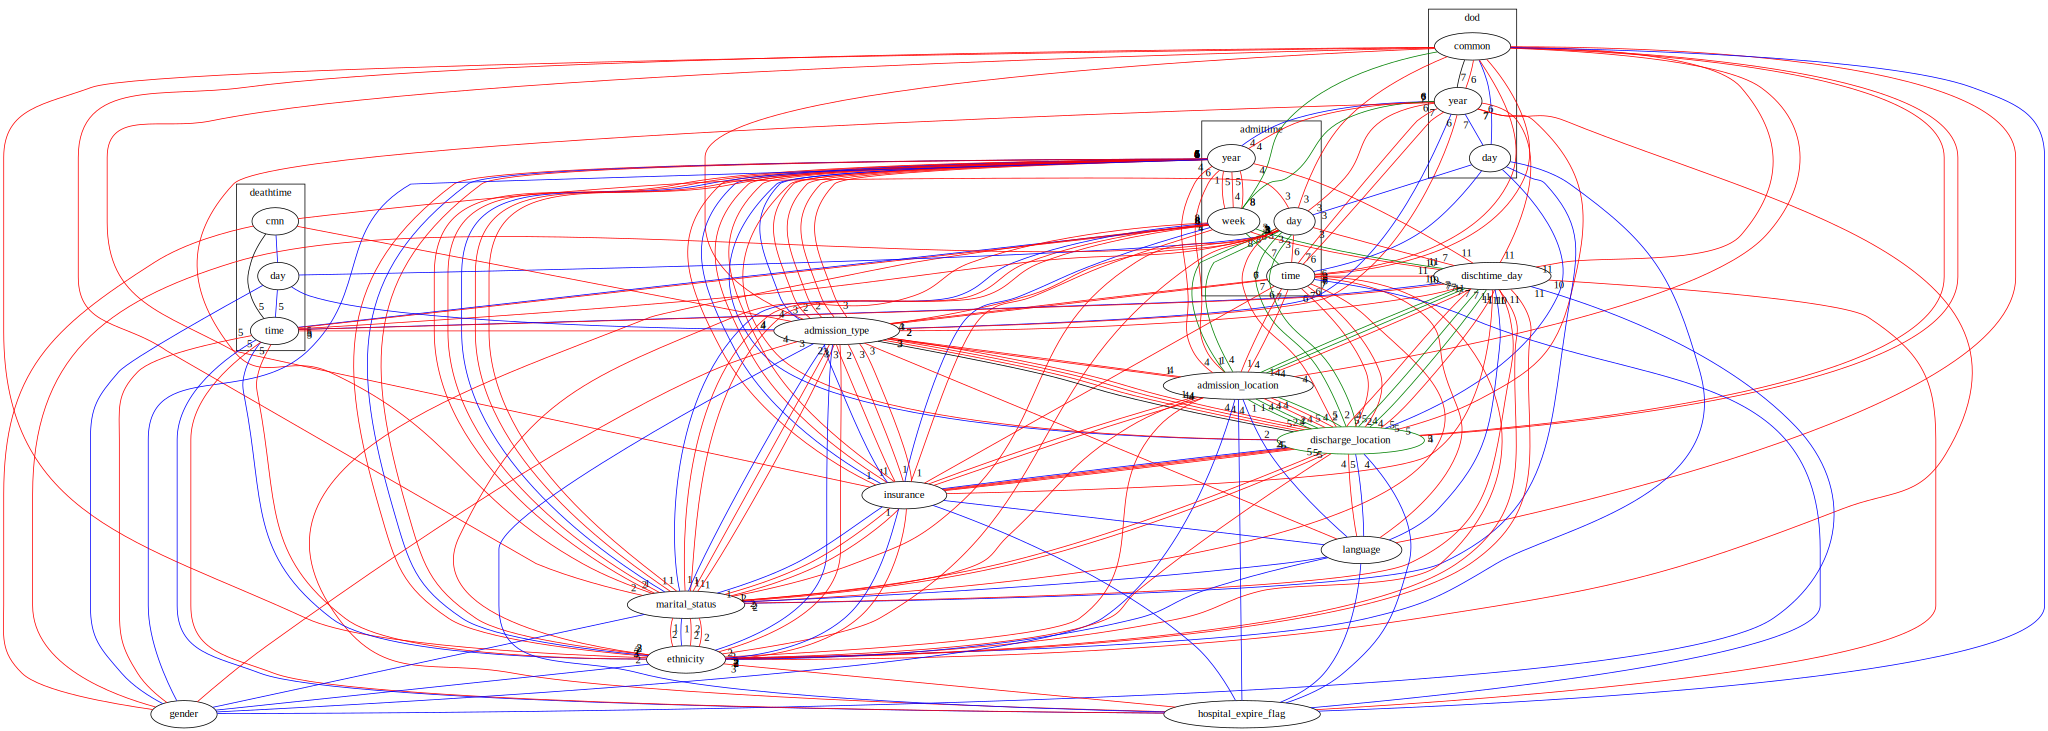

INFO     Removing node `ethnicity.ethnicity[0]` with cost: 1_920                                                             base.py:98


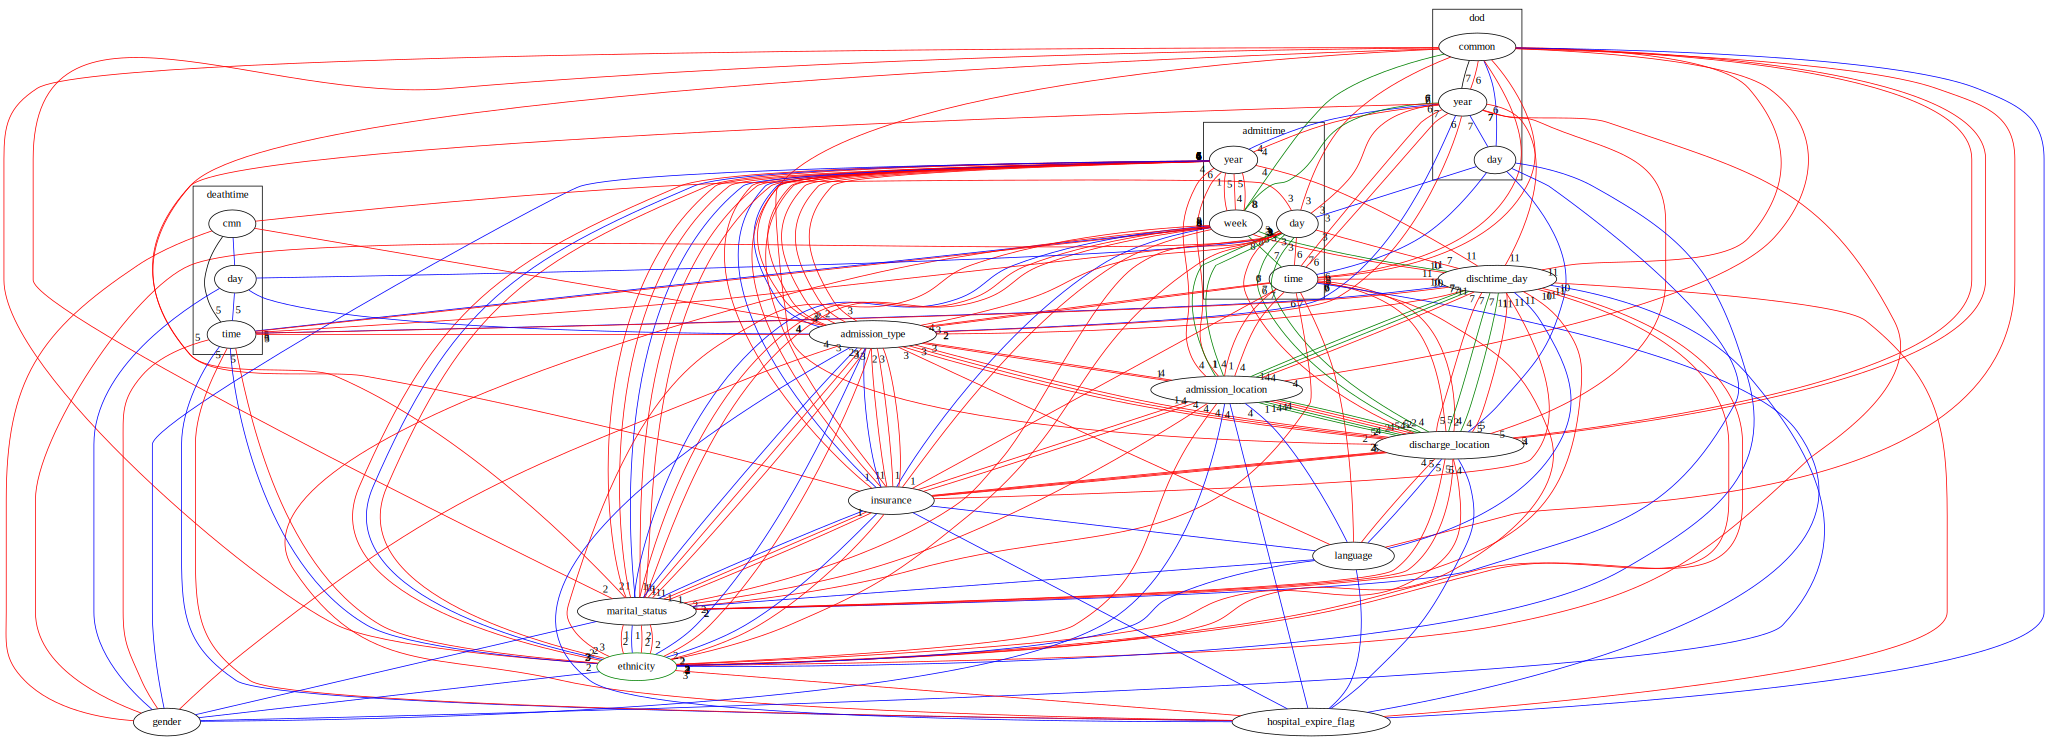

INFO     Removing node `dod.dod_year[0]` with cost: 1_980                                                                    base.py:98


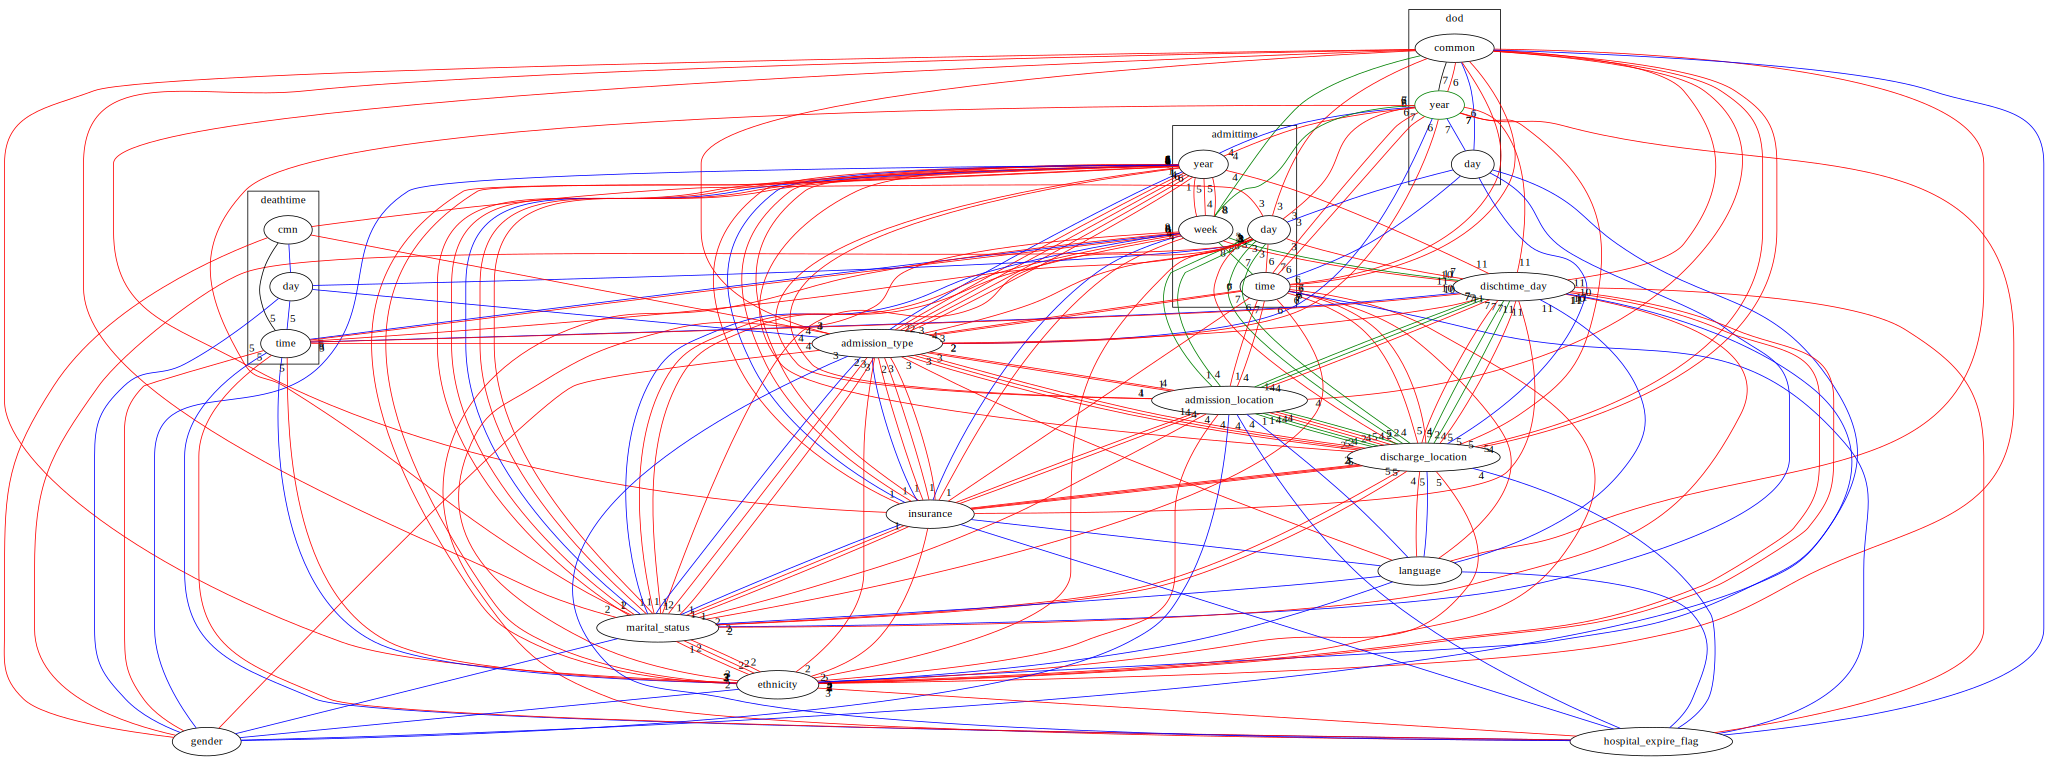

INFO     Removing node `deathtime.deathtime_time[0]` with cost: 2_000                                                        base.py:98


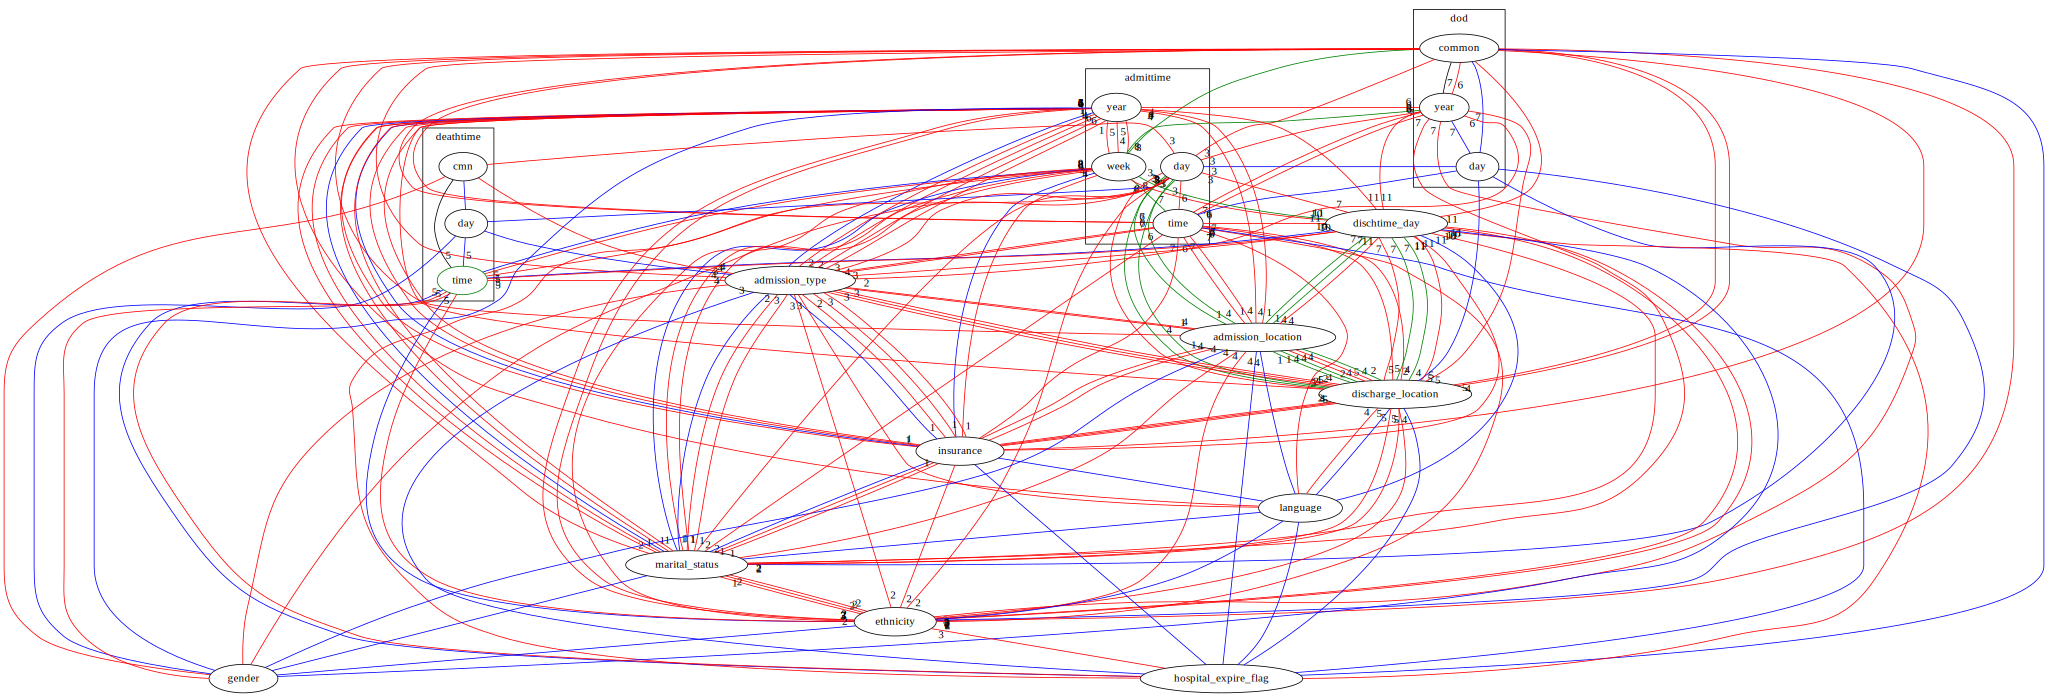

INFO     Removing node `ethnicity.ethnicity[3]` with cost: 800                                                               base.py:98


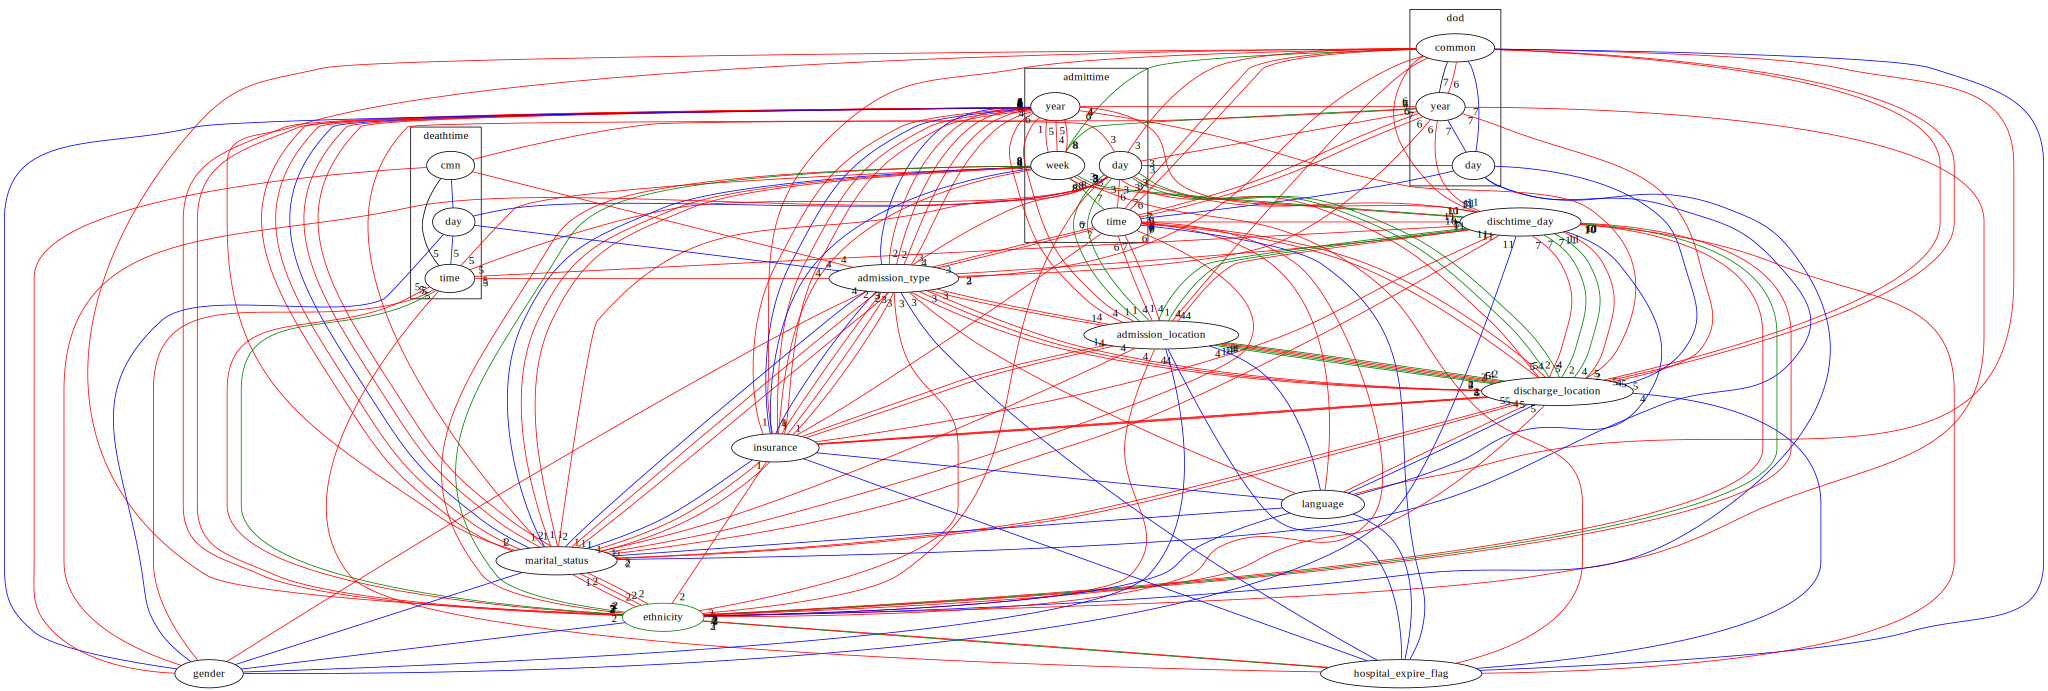

INFO     Removing node `deathtime.deathtime_cmn[0]` with cost: 2_056                                                         base.py:98


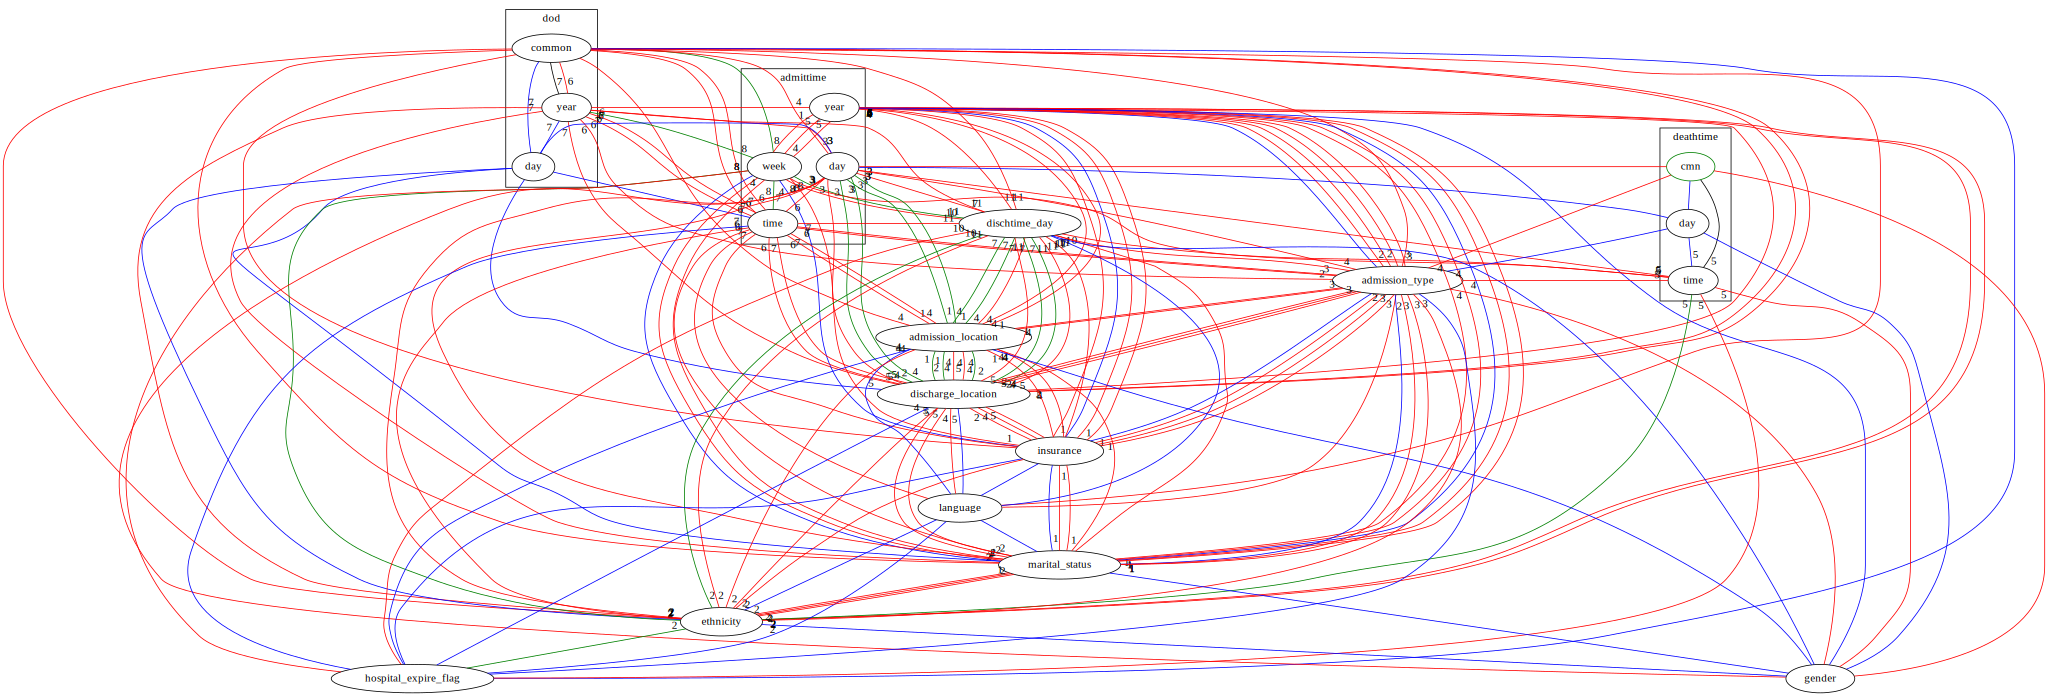

INFO     Removing node `deathtime.deathtime_day[0]` with cost: 2_056                                                         base.py:98


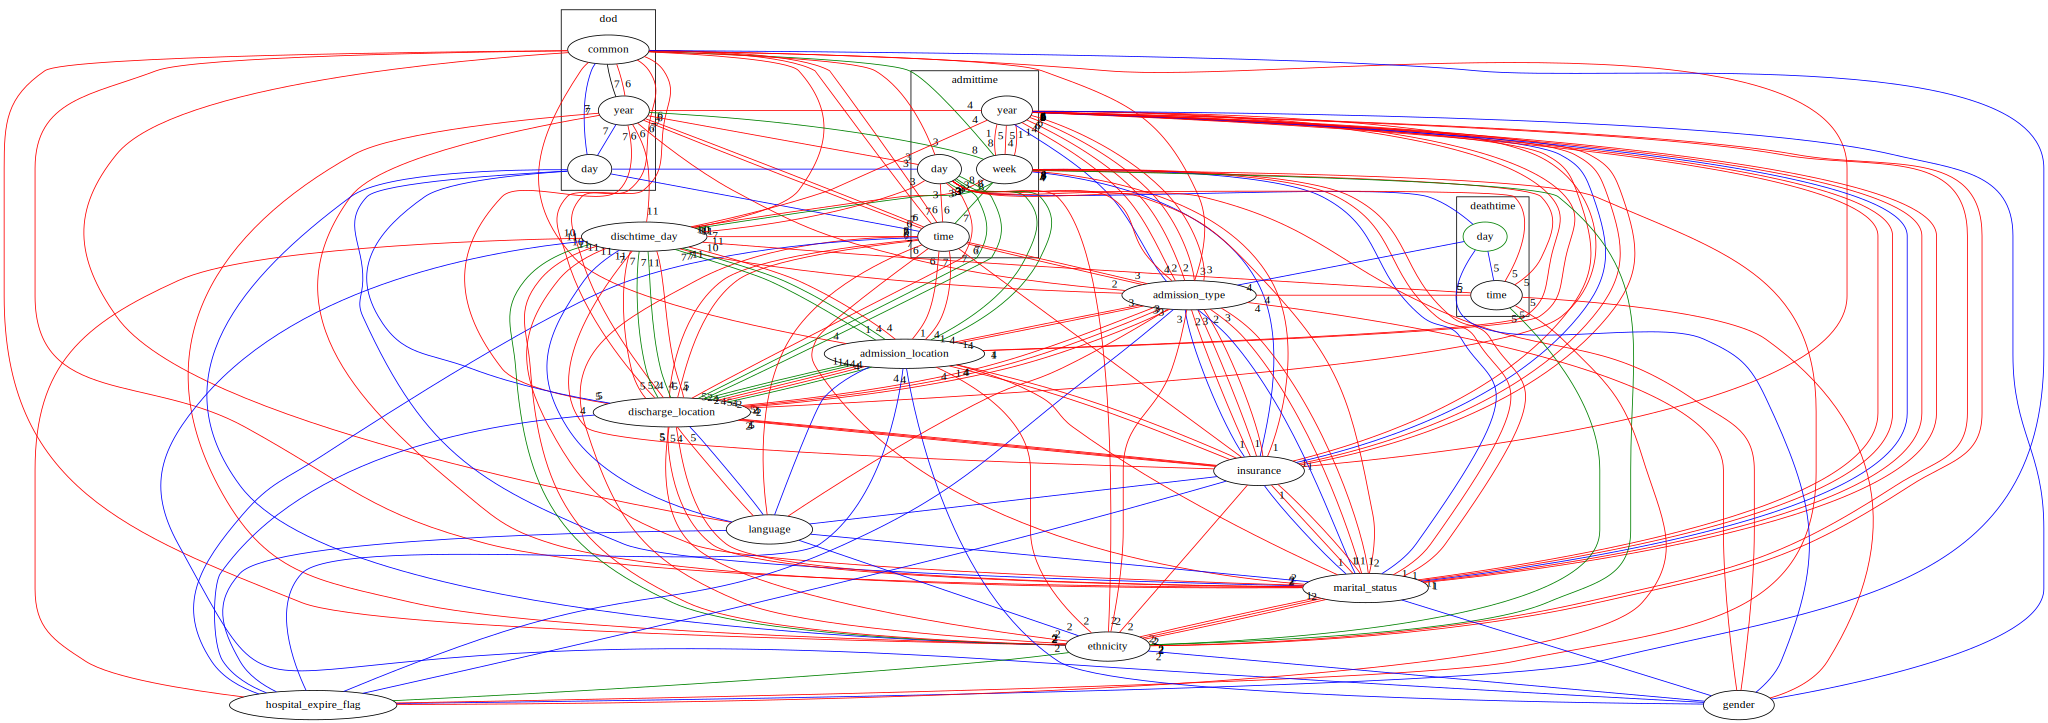

INFO     Removing node `admission_type.admission_type[4]` with cost: 80                                                      base.py:98


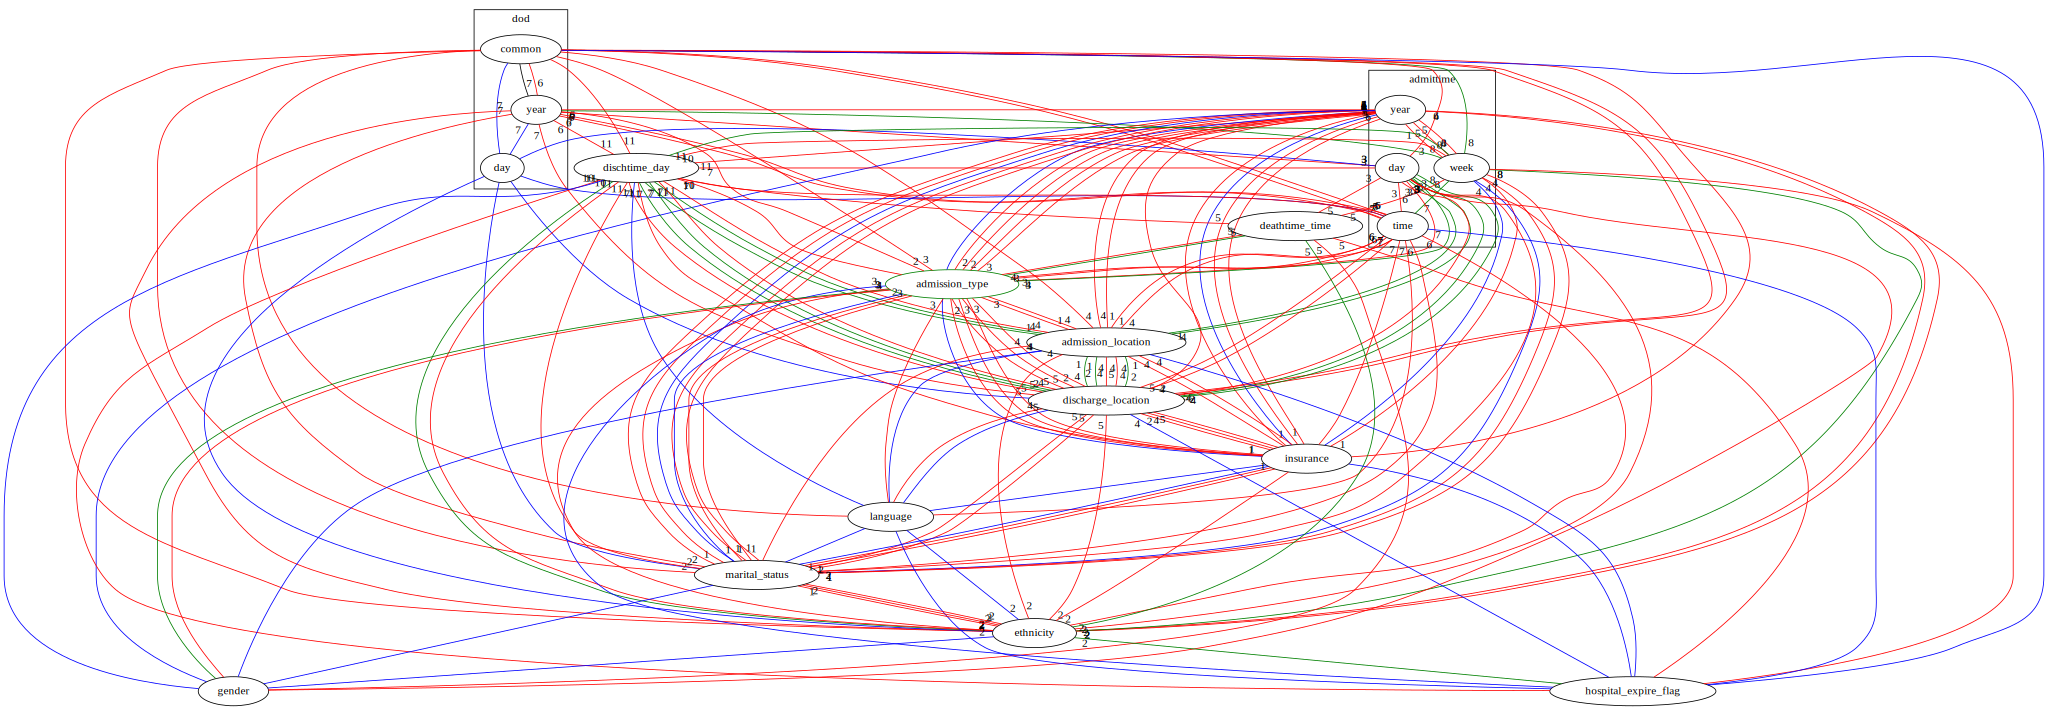

INFO     Removing node `dischtime.dischtime_day[10]` with cost: 2_400                                                        base.py:98


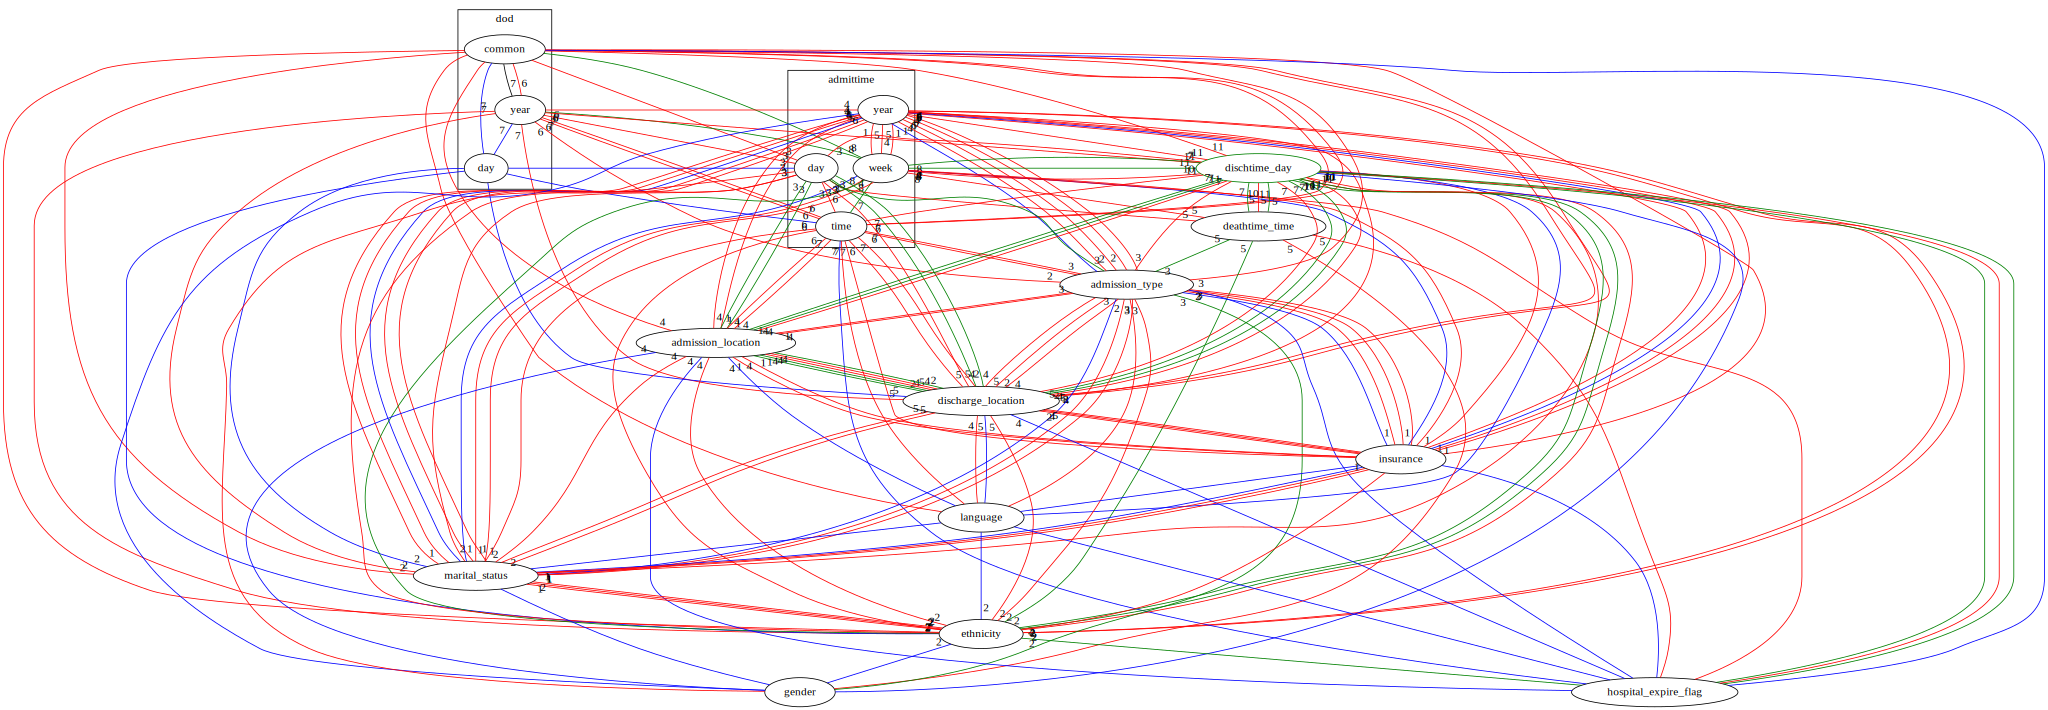

INFO     Removing node `dod.dod_day[0]` with cost: 2_816                                                                     base.py:98


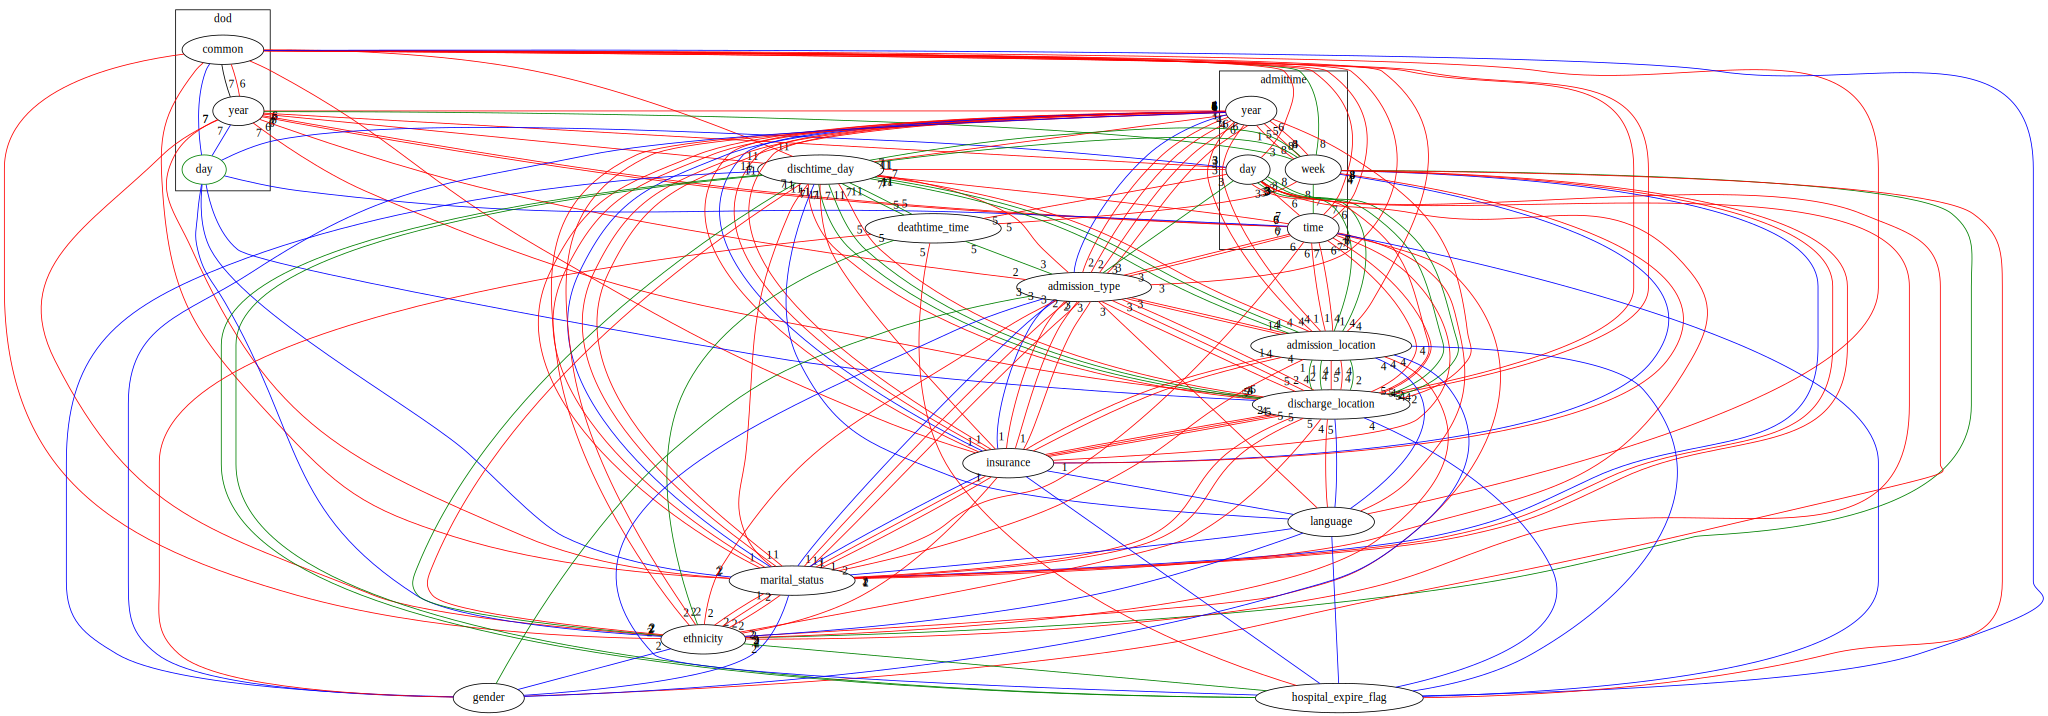

INFO     Removing node `dod.dod_year[7]` with cost: 640                                                                      base.py:98


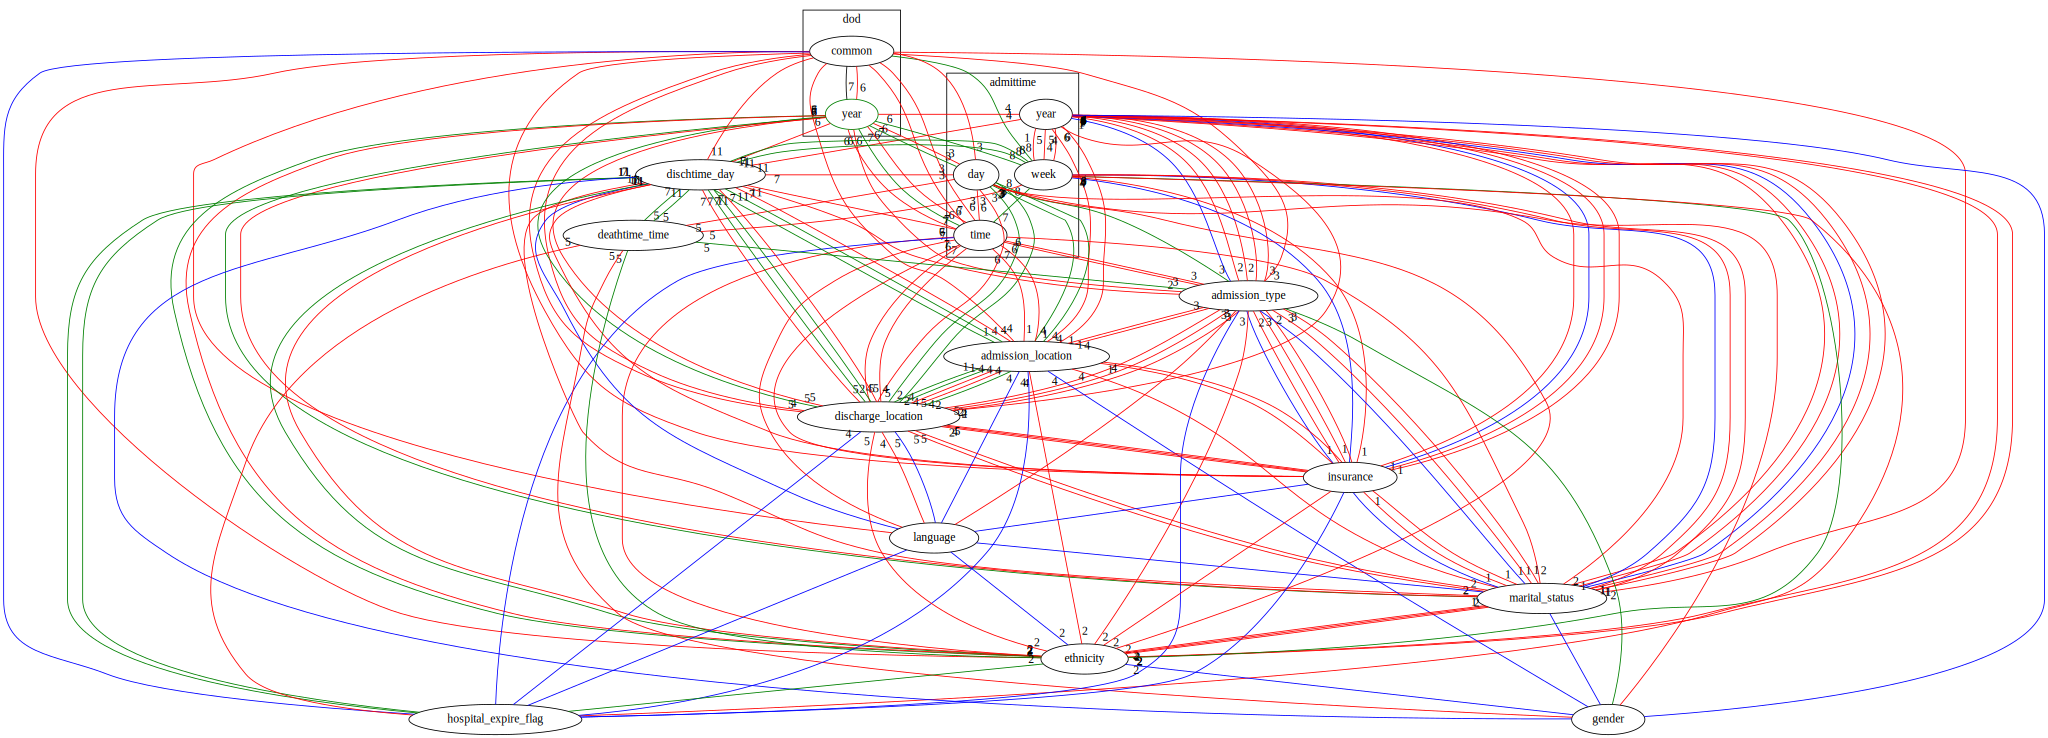

INFO     Removing node `marital_status.marital_status[2]` with cost: 1_280                                                   base.py:98


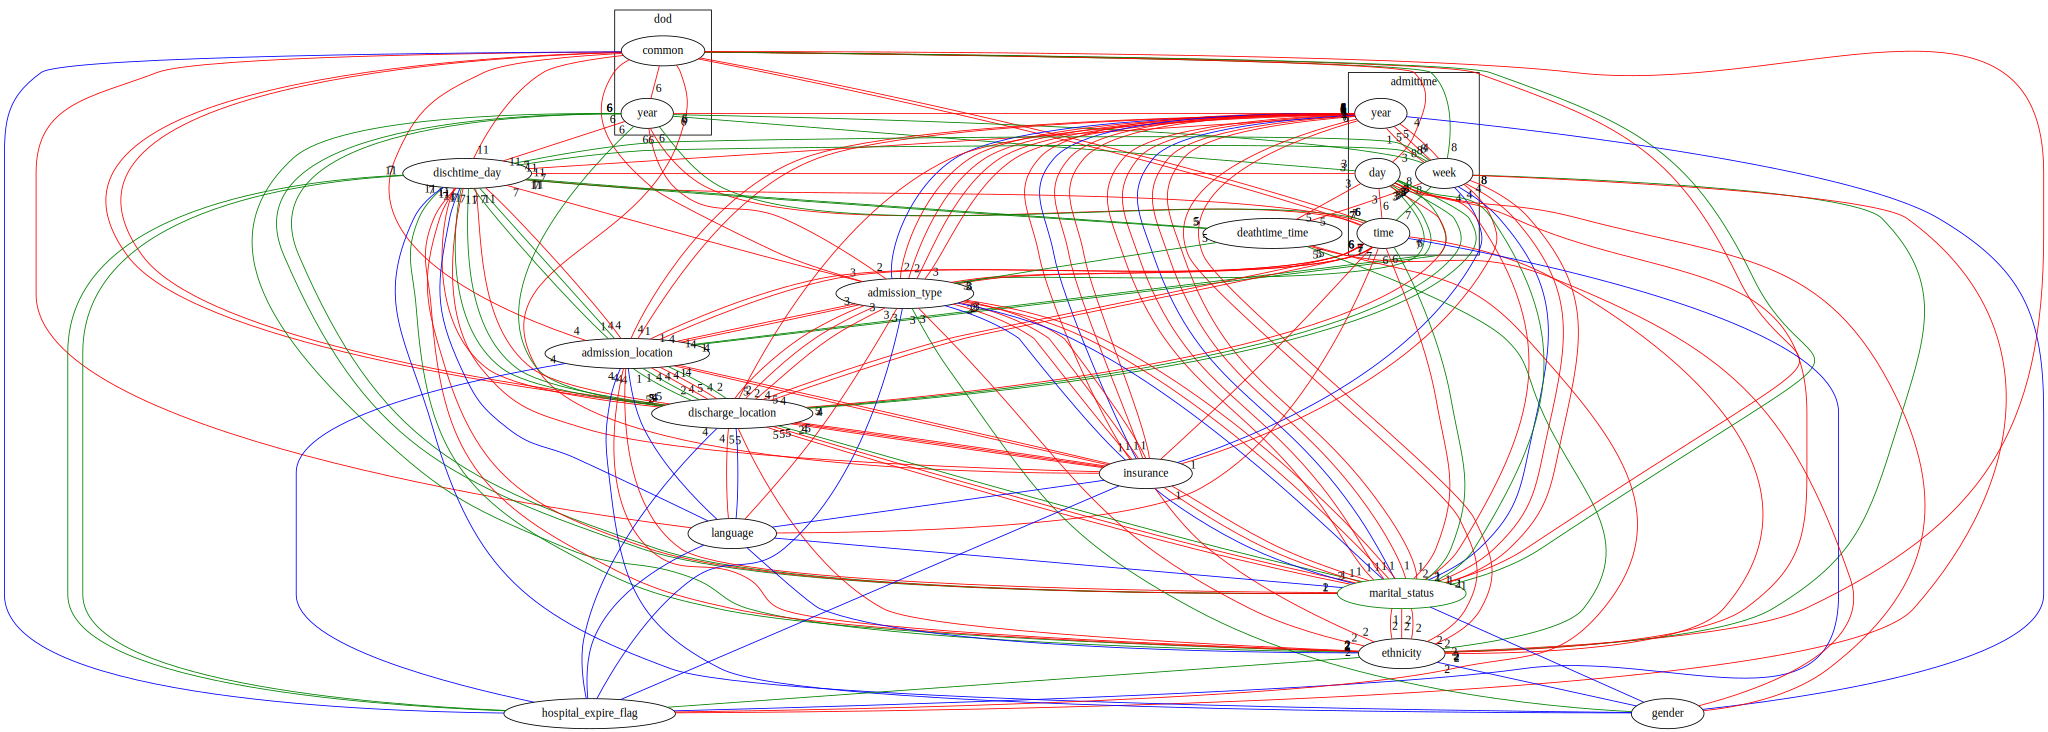

INFO     Removing node `admittime.admittime_week[4]` with cost: 4_992                                                        base.py:98


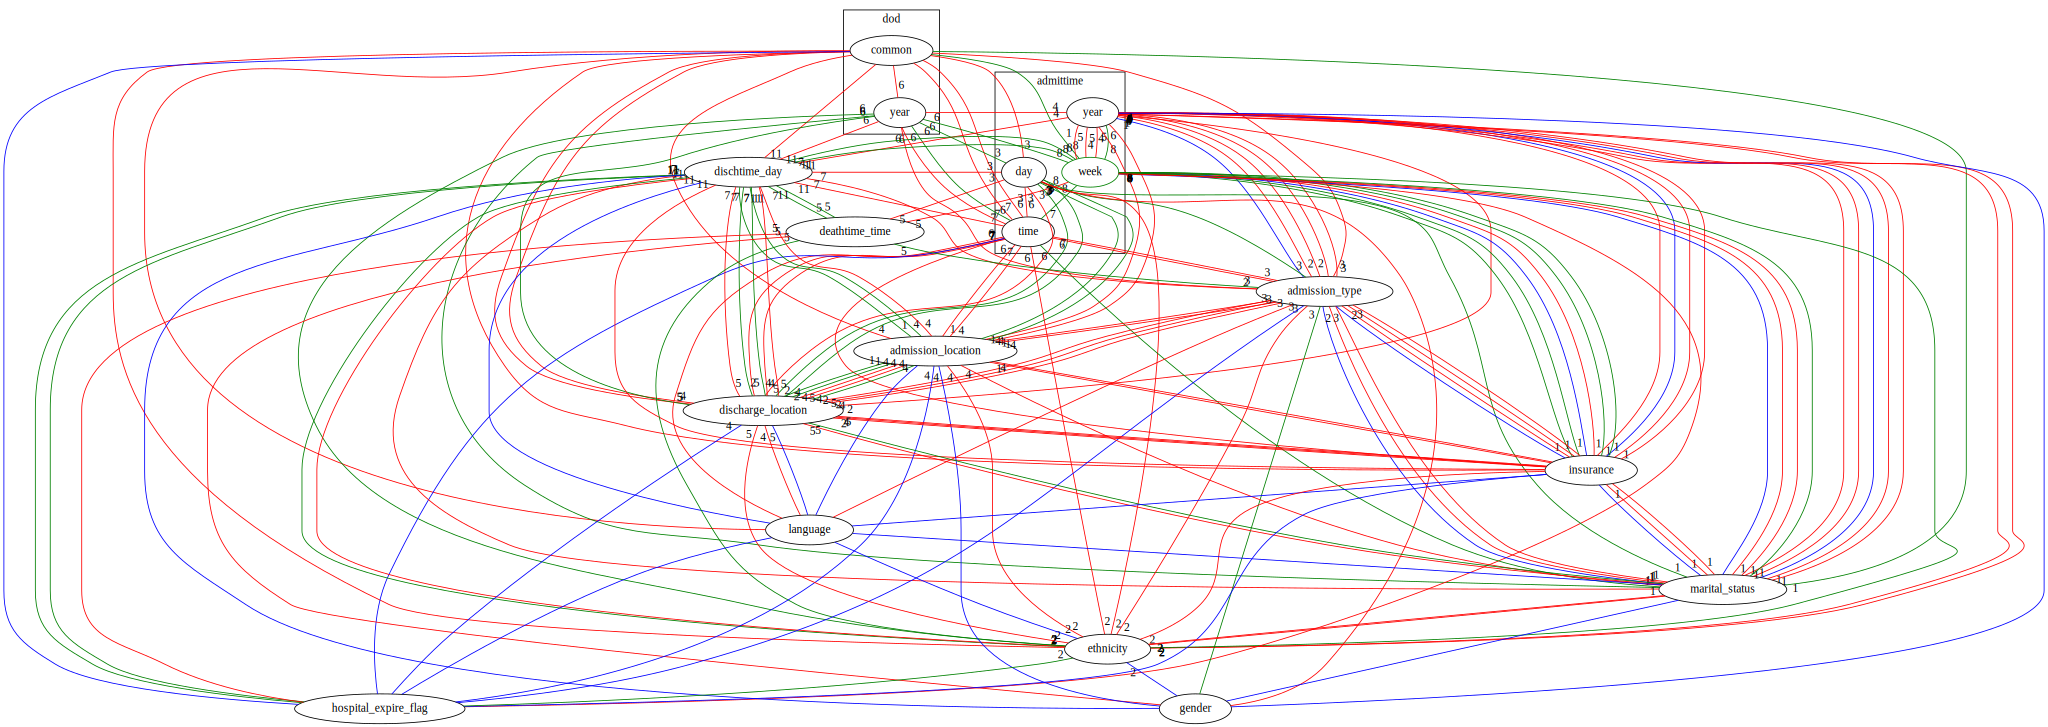

INFO     Removing node `admittime.admittime_year[5]` with cost: 9_360                                                        base.py:98


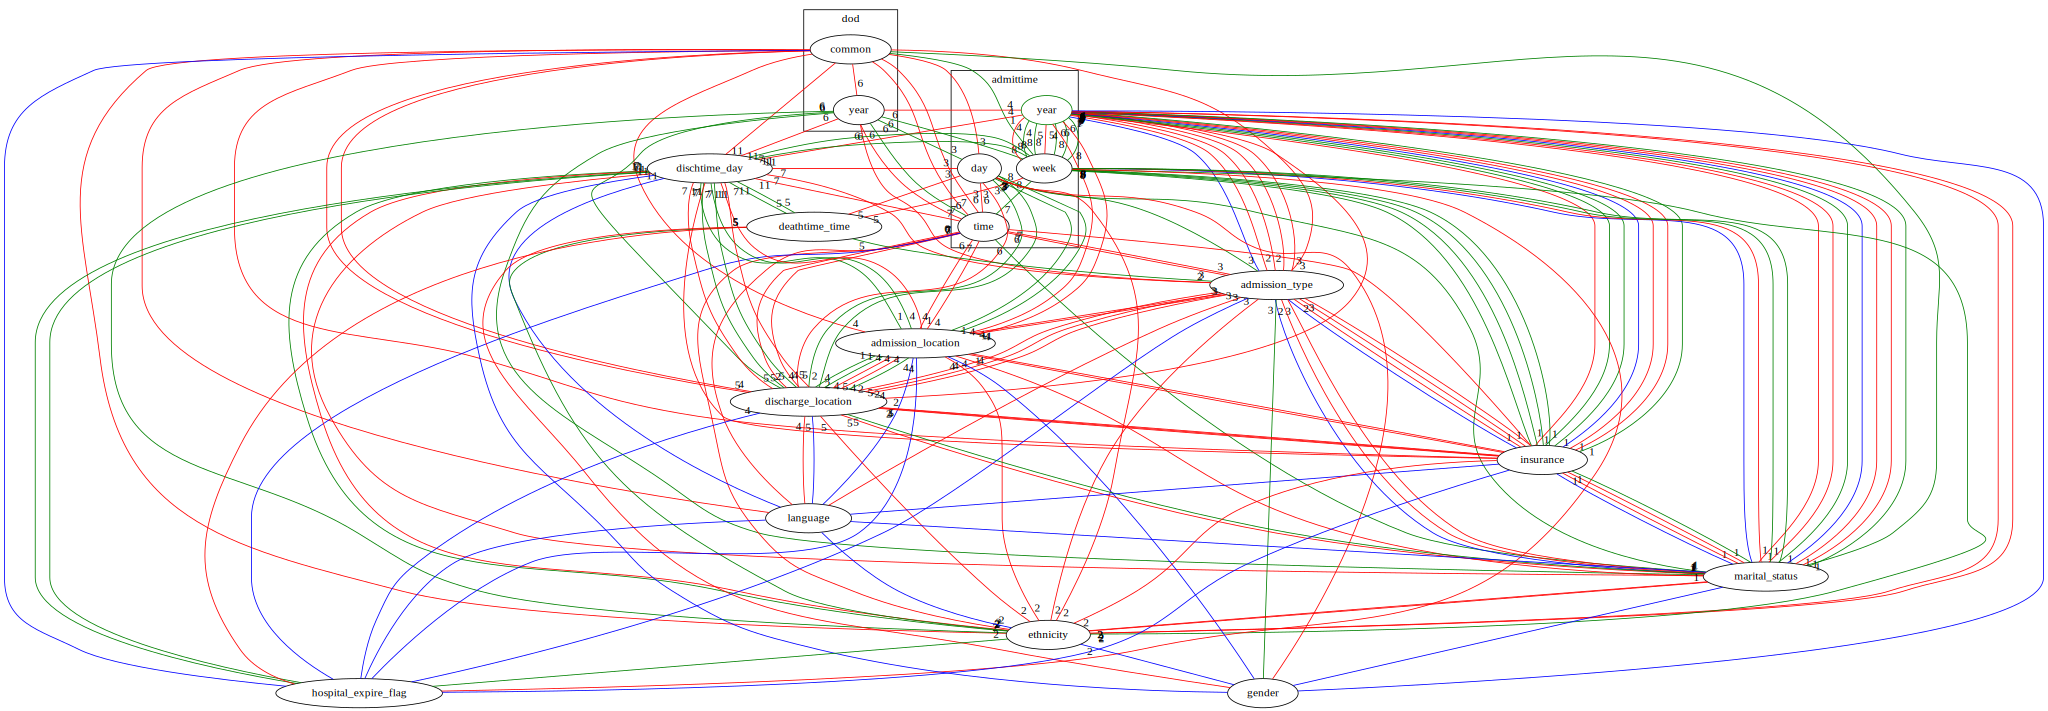

INFO     Removing node `admission_type.admission_type[2]` with cost: 9_720                                                   base.py:98


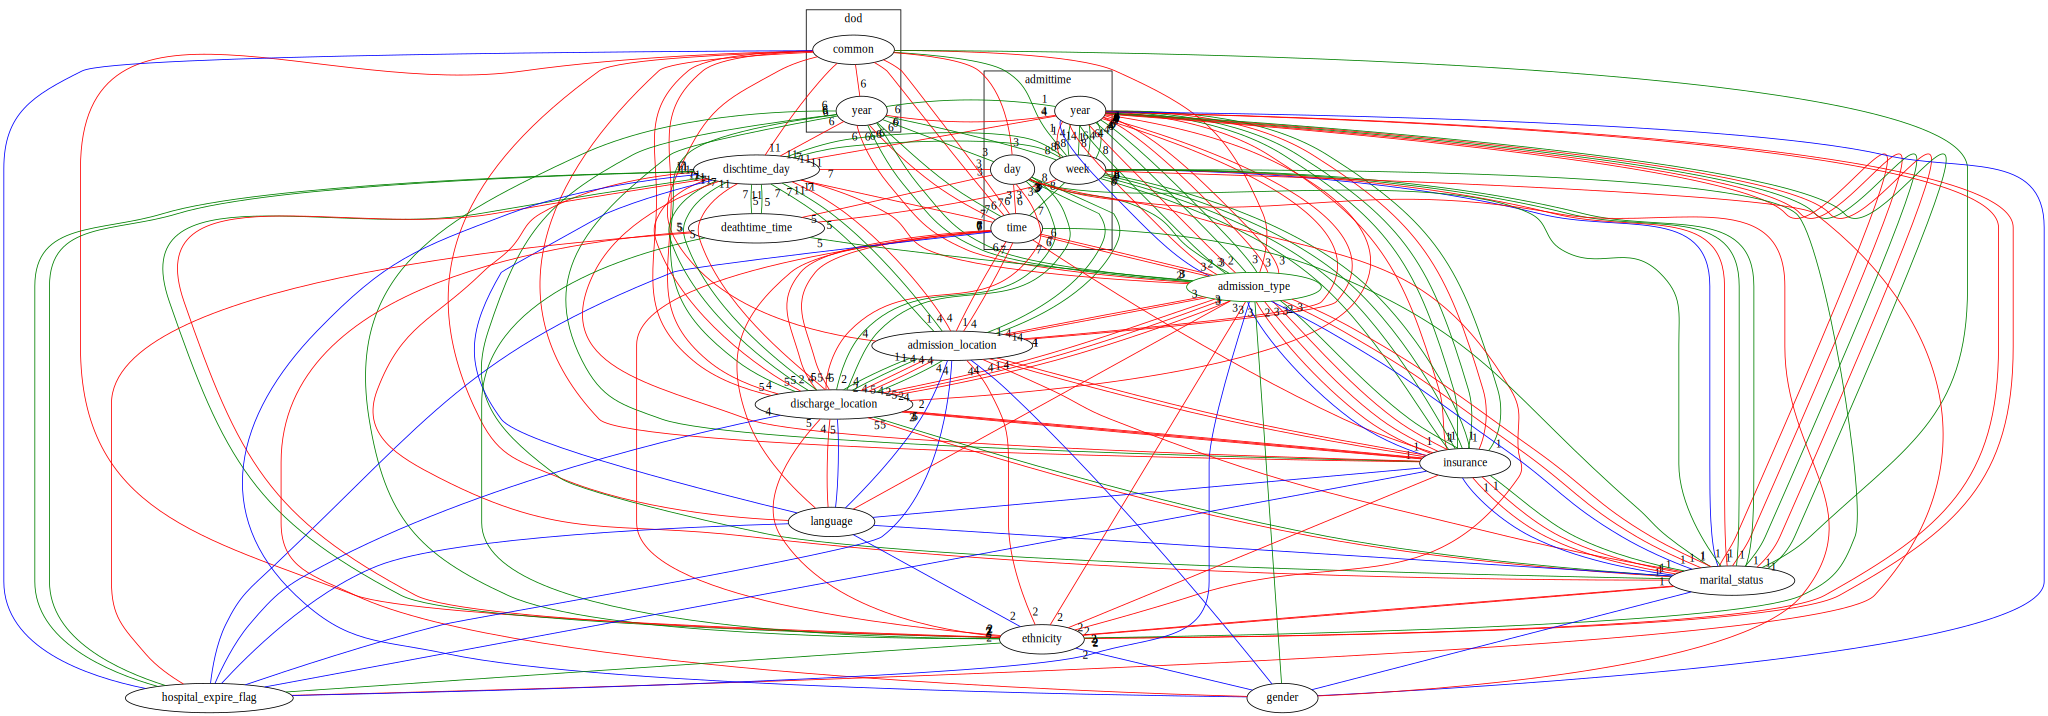

INFO     Removing node `admittime.admittime_week[0]` with cost: 21_060                                                       base.py:98


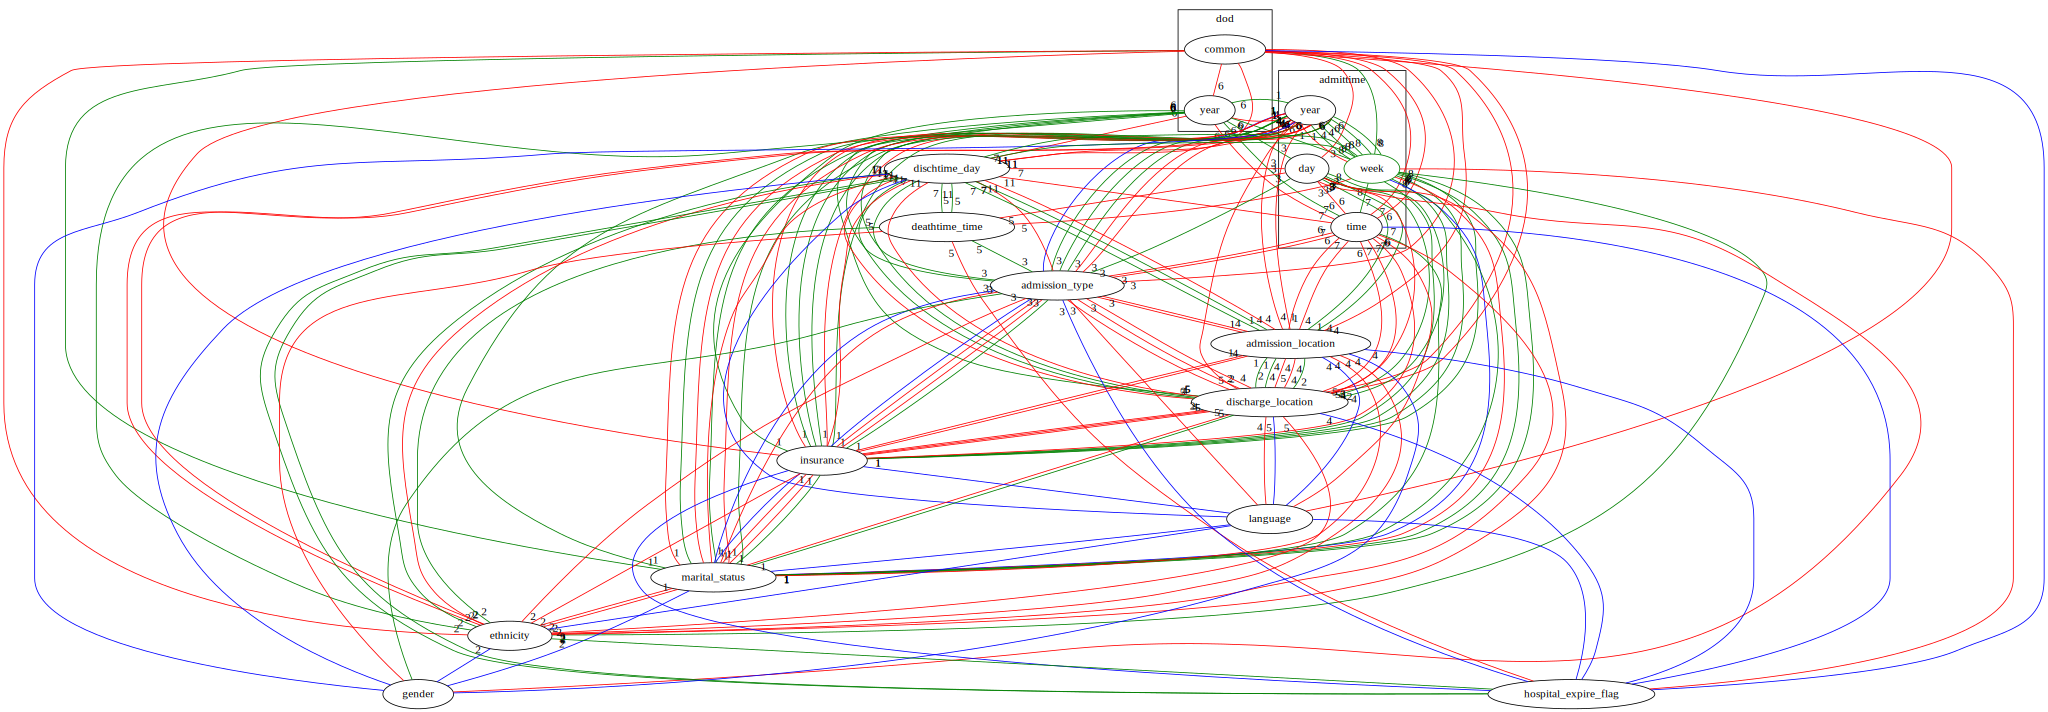

INFO     Removing node `deathtime.deathtime_time[5]` with cost: 38_400                                                       base.py:98


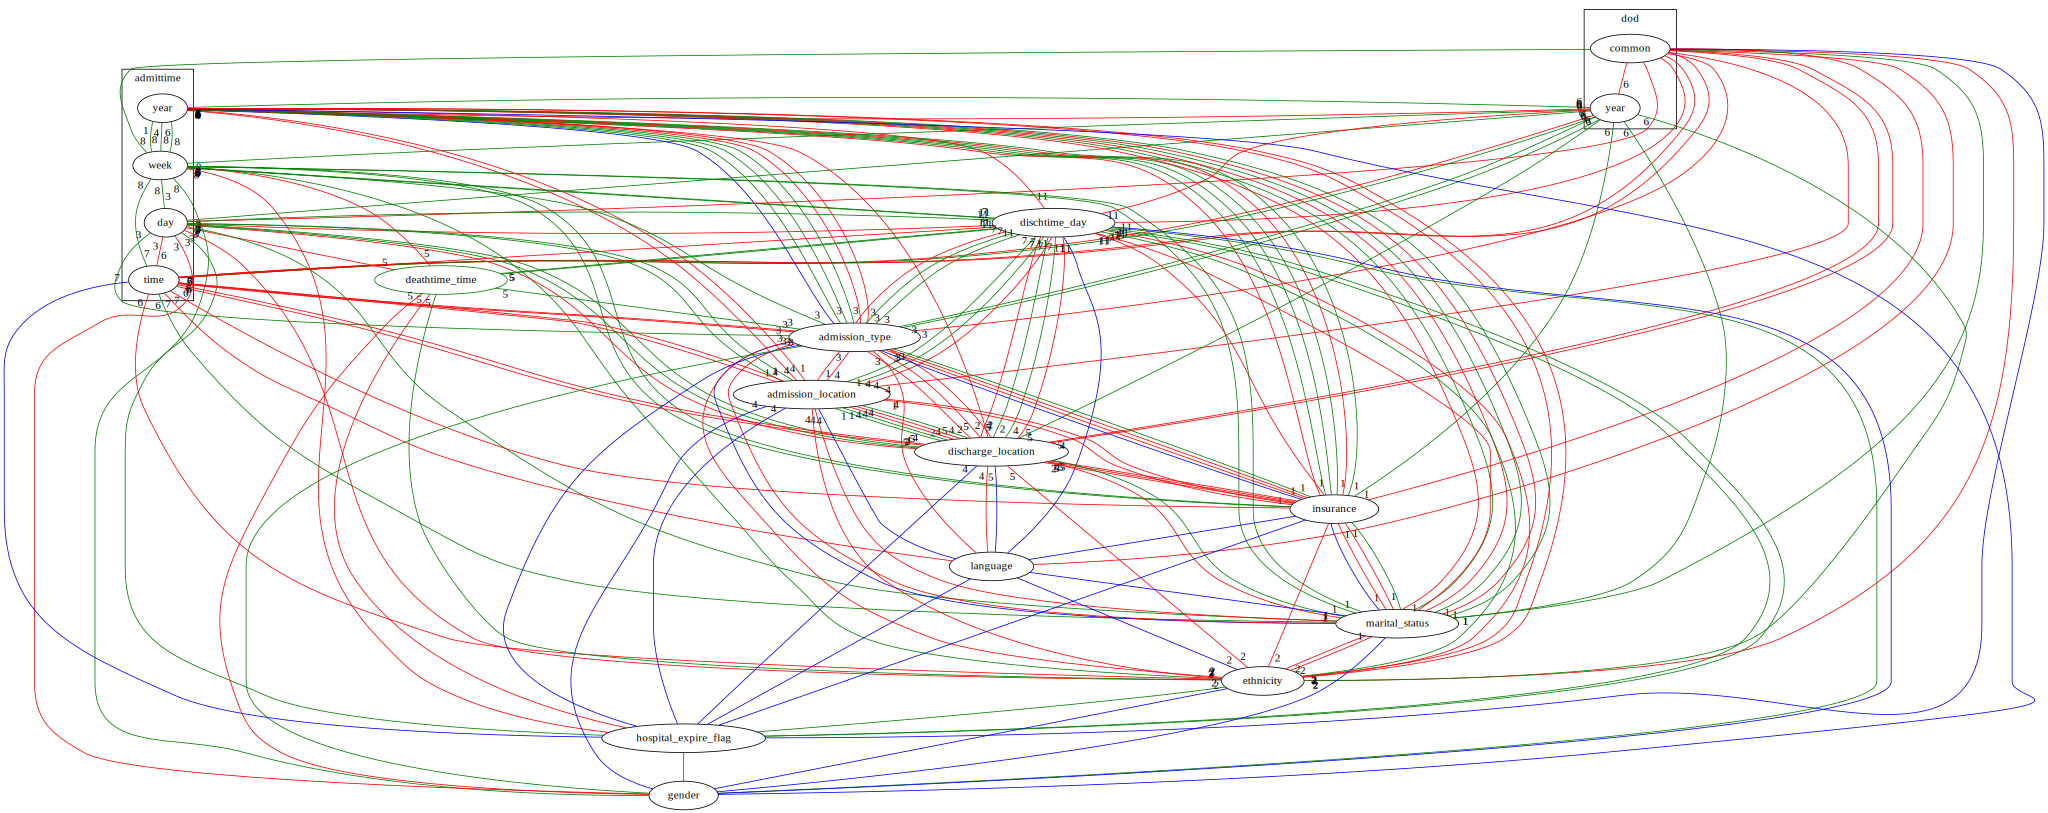

INFO     Removing node `language.language[0]` with cost: 61_440                                                              base.py:98


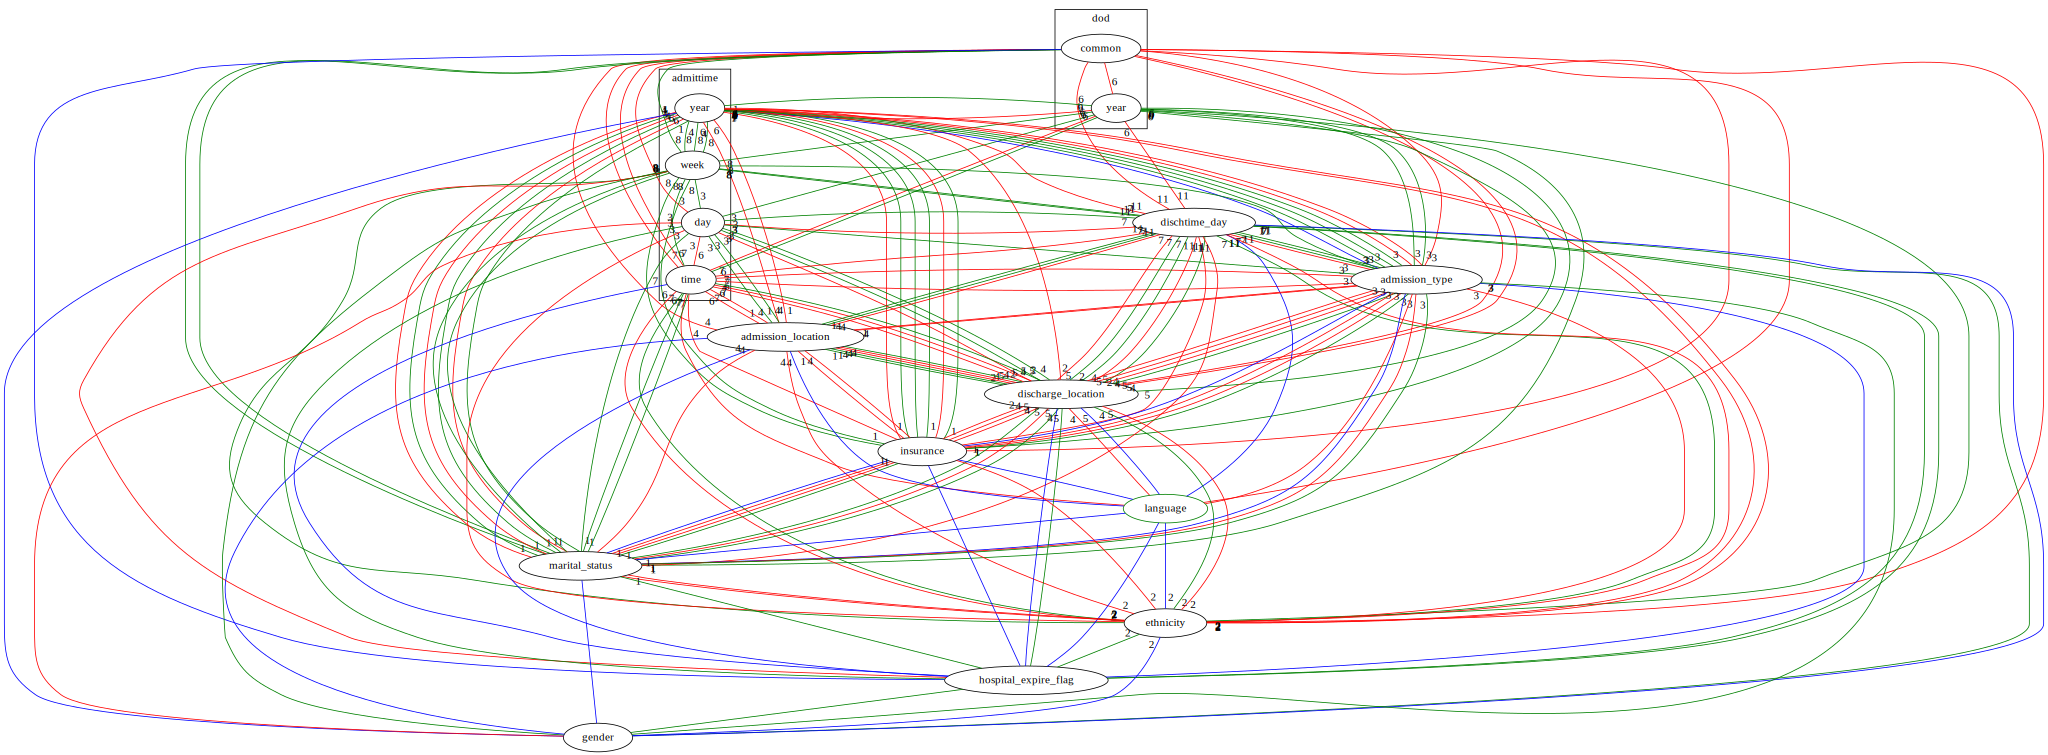

INFO     Removing node `admittime.admittime_year[1]` with cost: 91_125                                                       base.py:98


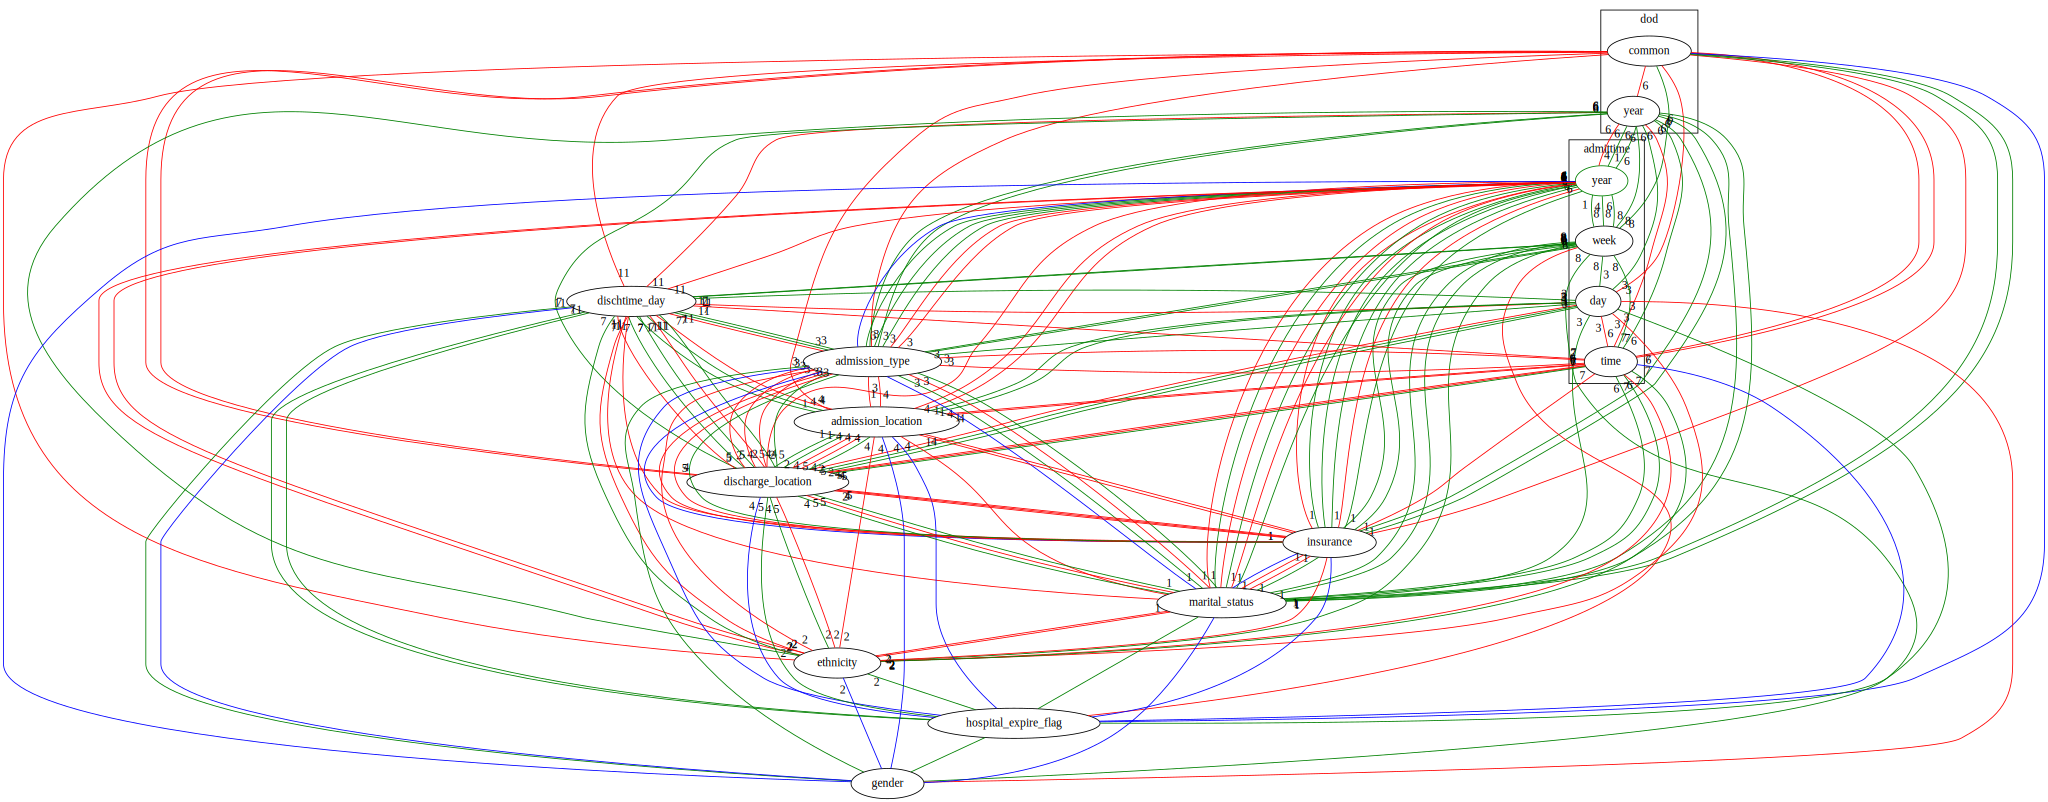

INFO     Removing node `insurance.insurance[1]` with cost: 40_500                                                            base.py:98


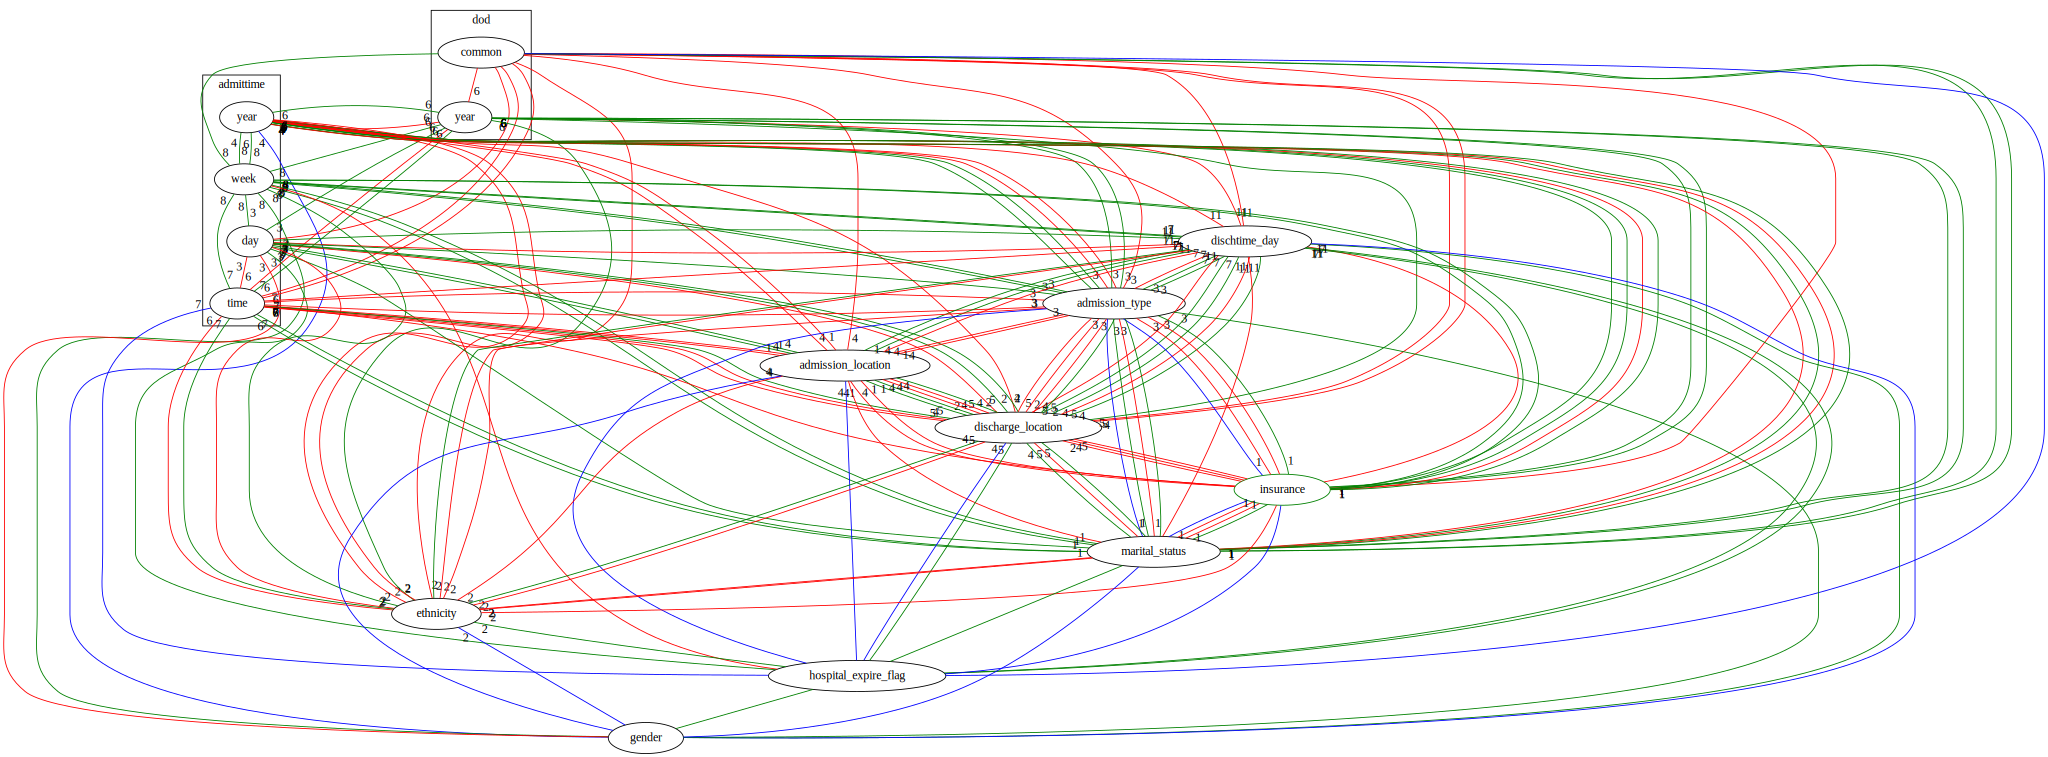

INFO     Removing node `admittime.admittime_time[6]` with cost: 92_160                                                       base.py:98


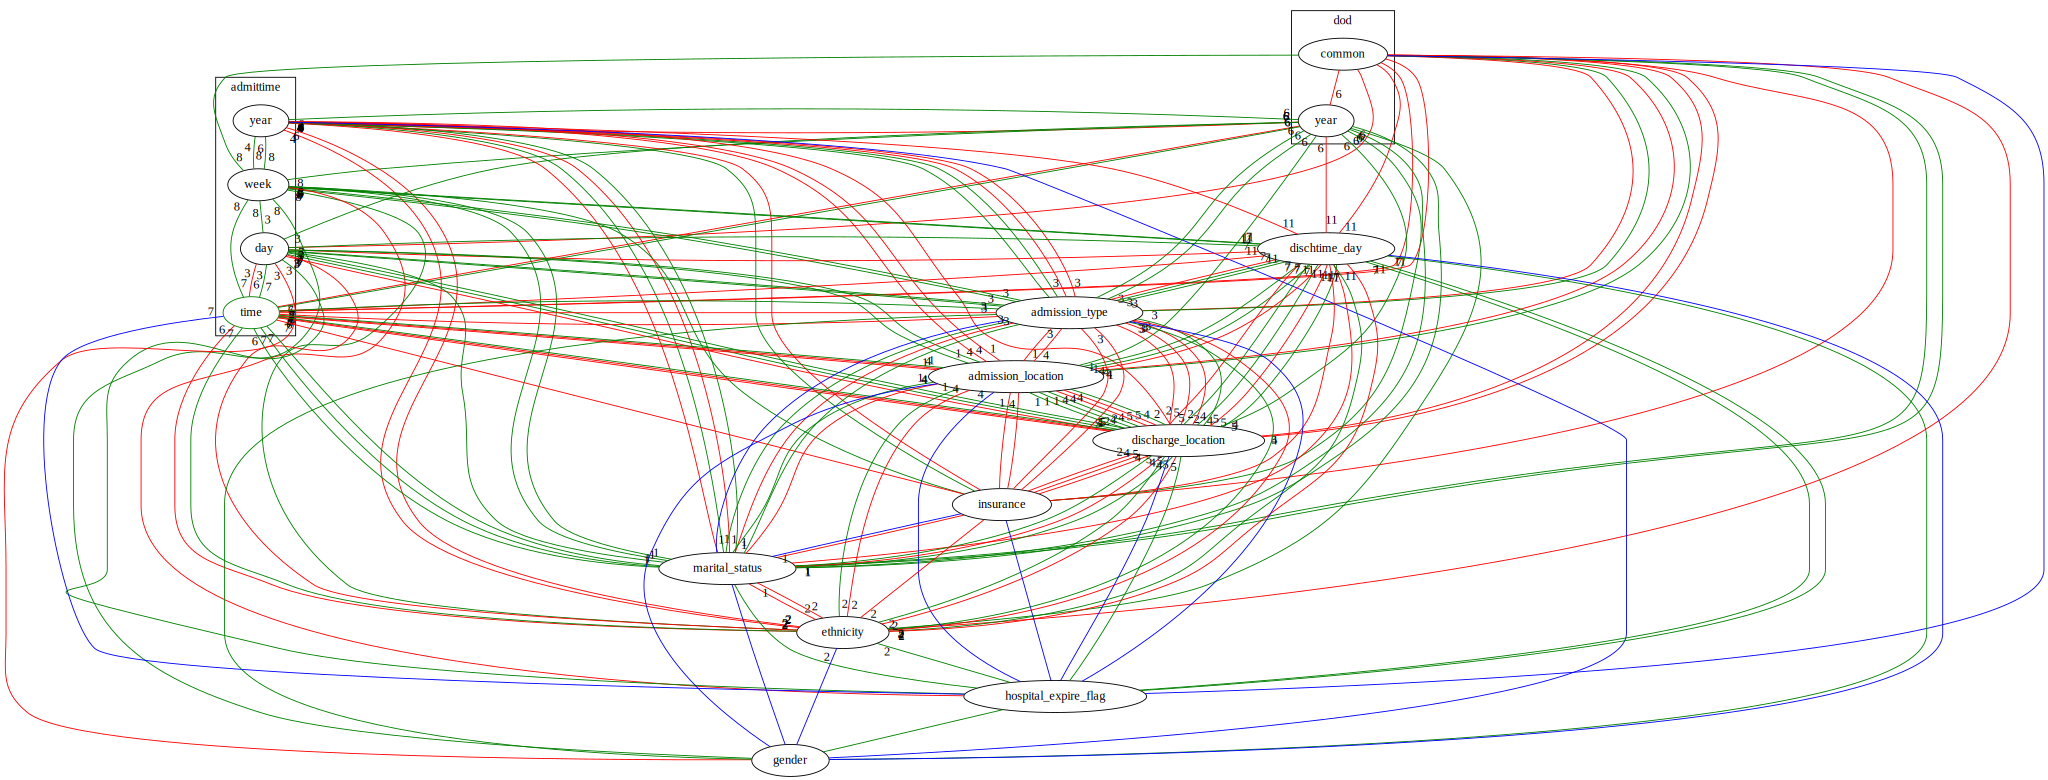

INFO     Removing node `discharge_location.discharge_location[2]` with cost: 207_360                                         base.py:98


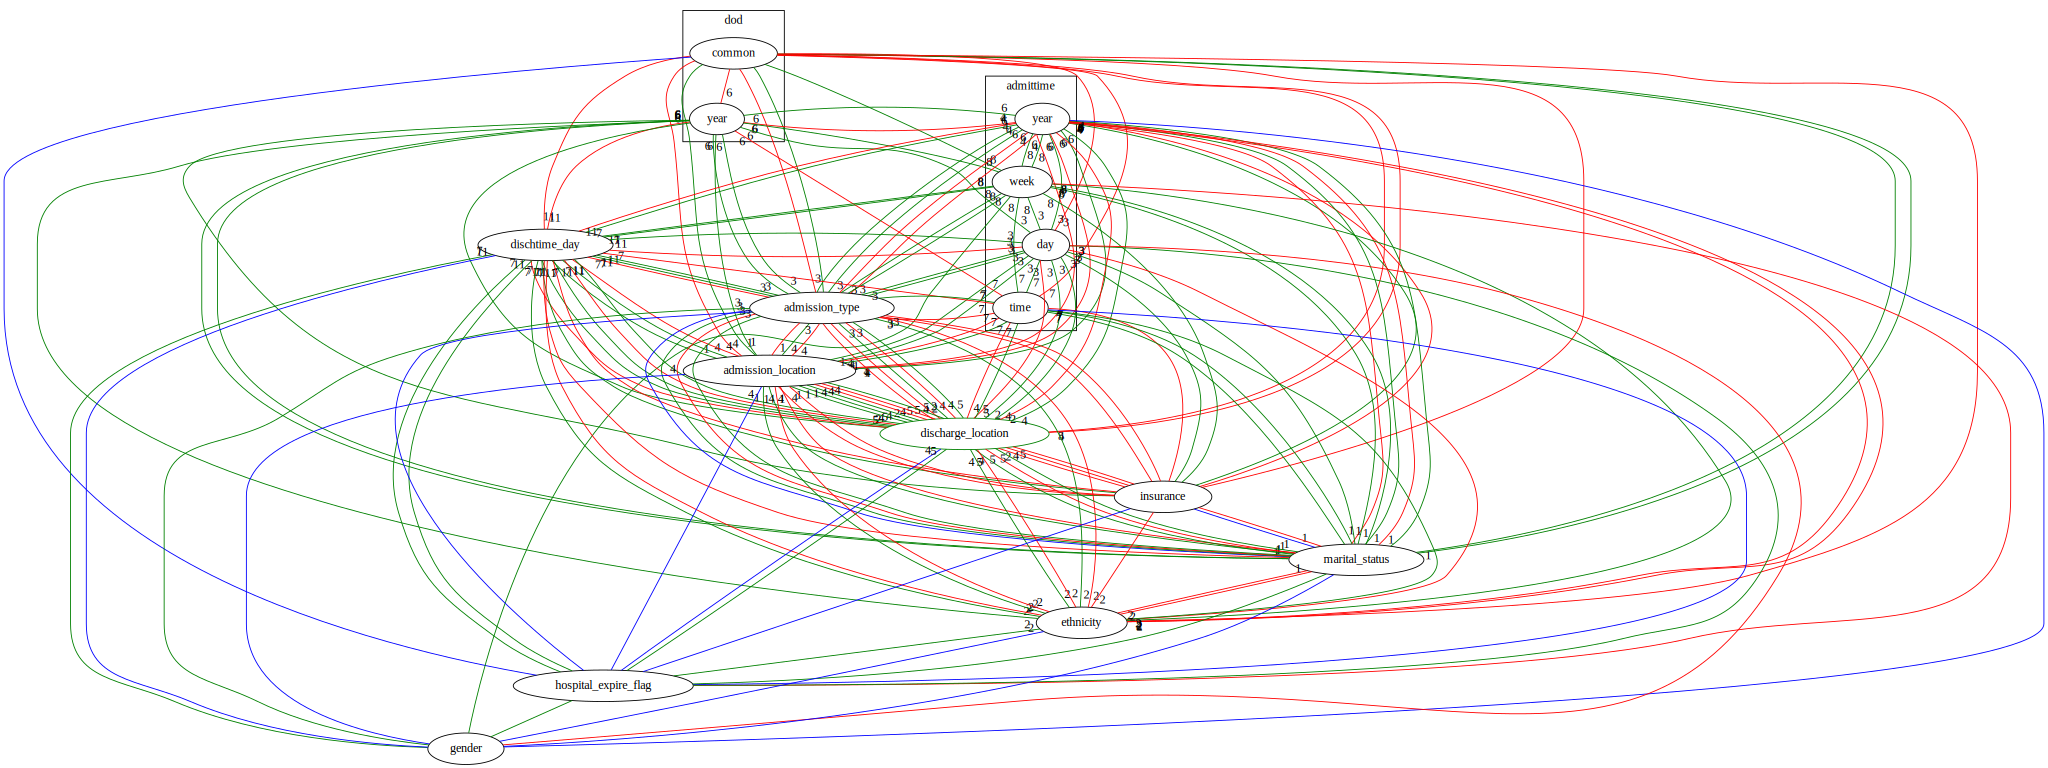

INFO     Removing node `gender.gender[0]` with cost: 921_600                                                                 base.py:98


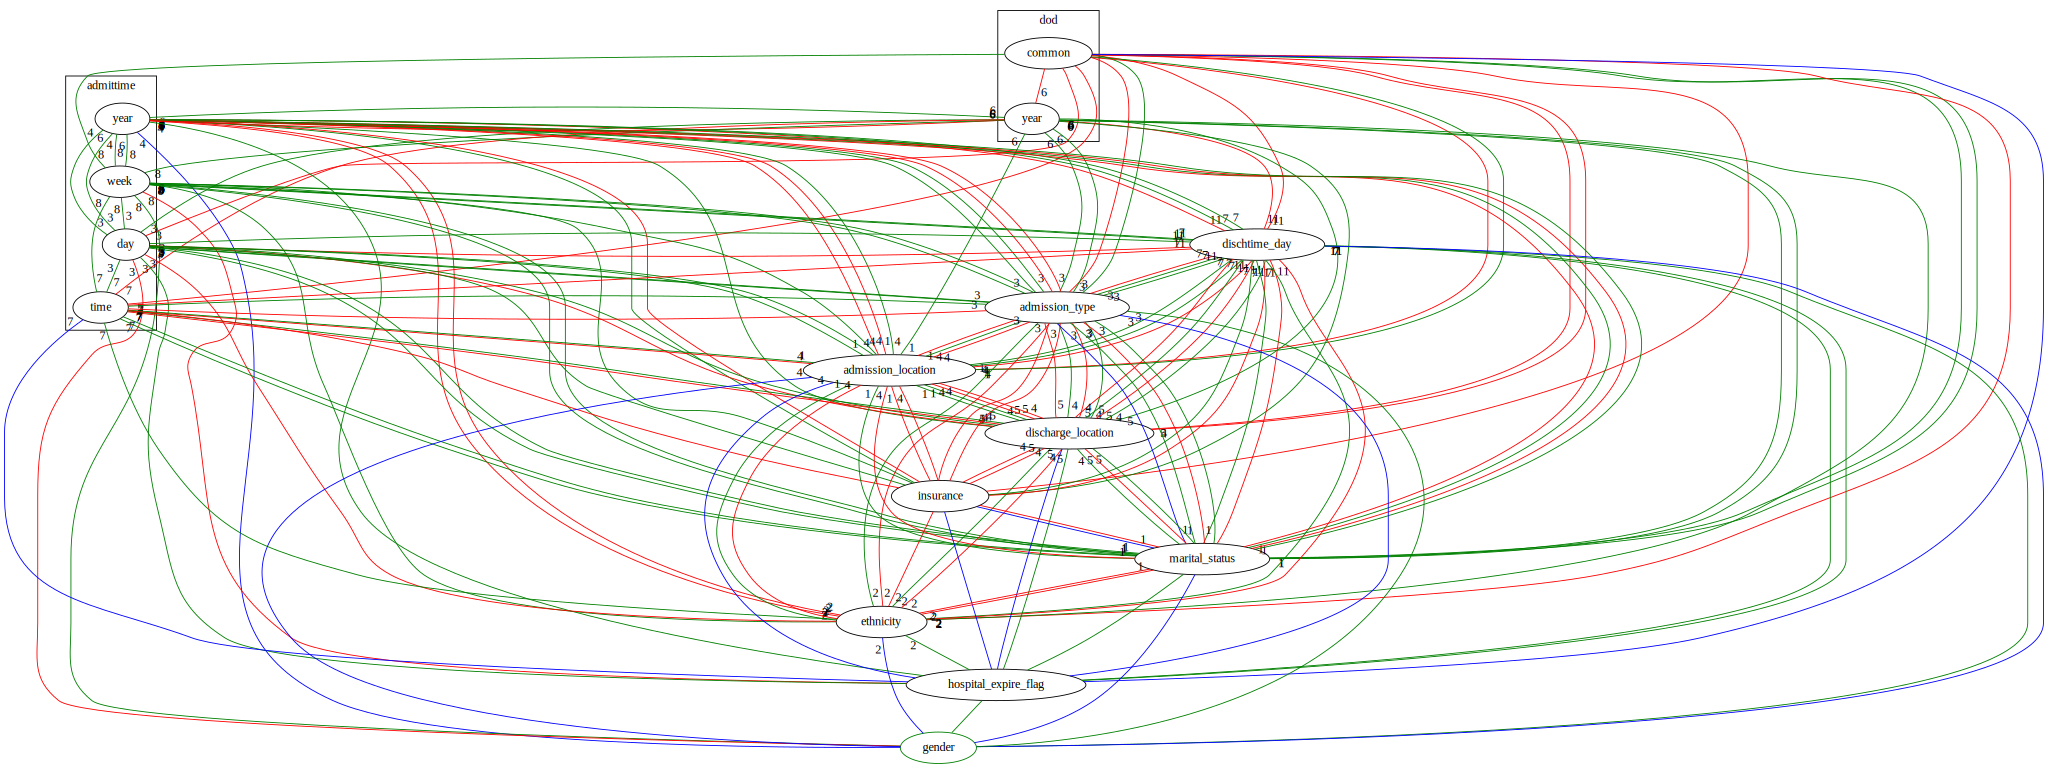

INFO     Removing node `dod.dod_common[0]` with cost: 6_912_000                                                              base.py:98


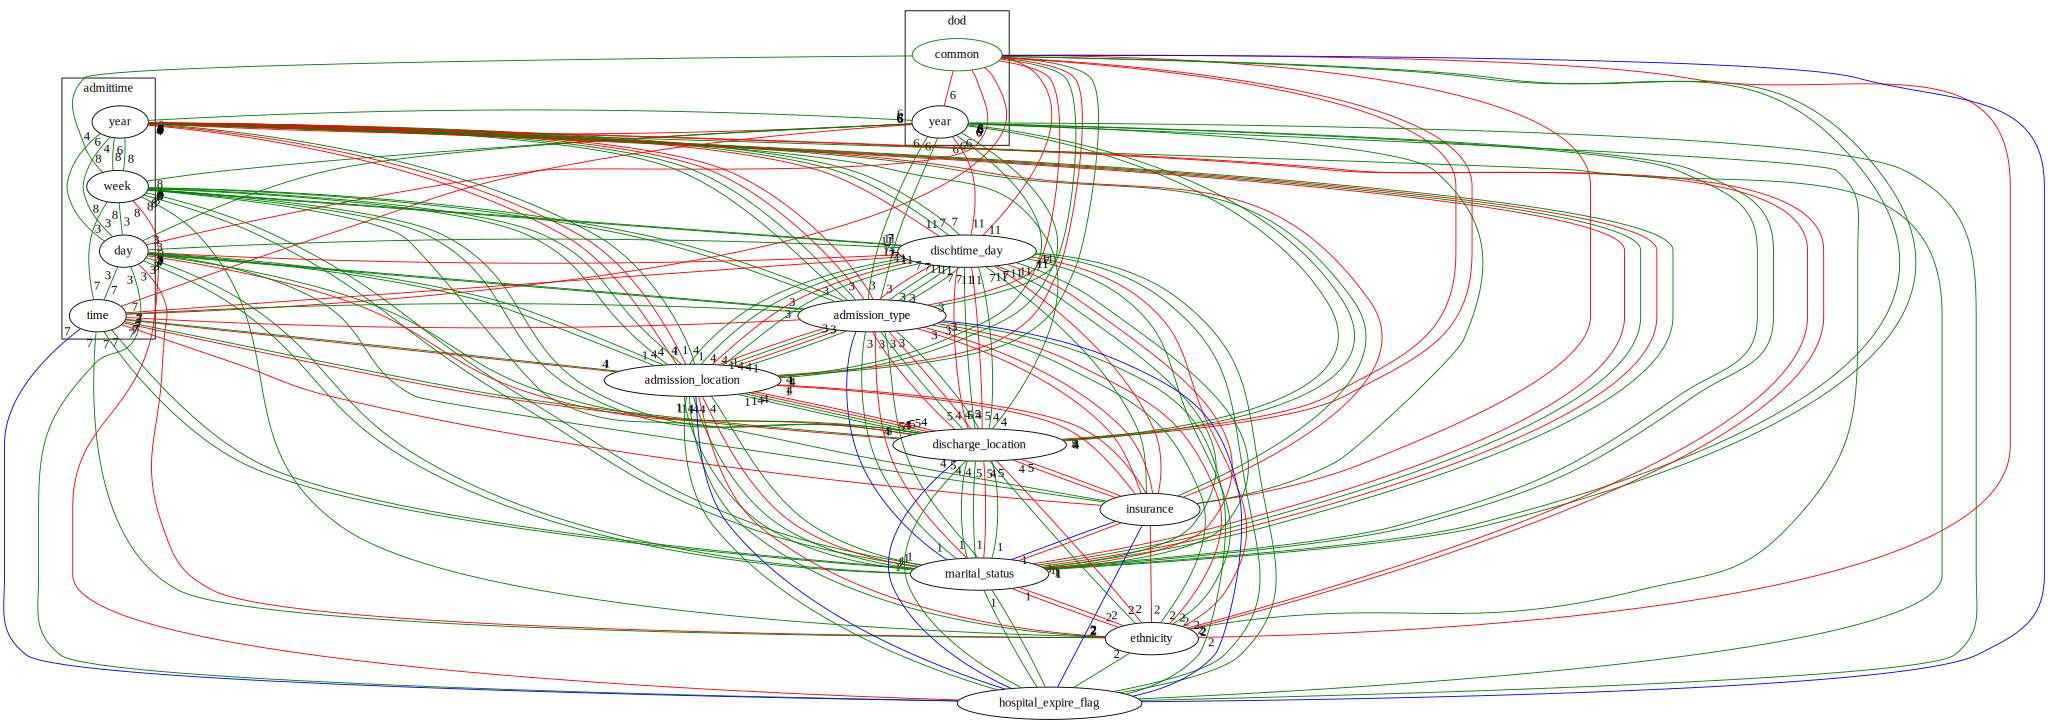

INFO     Removing node `admittime.admittime_time[7]` with cost: 6_912_000                                                    base.py:98


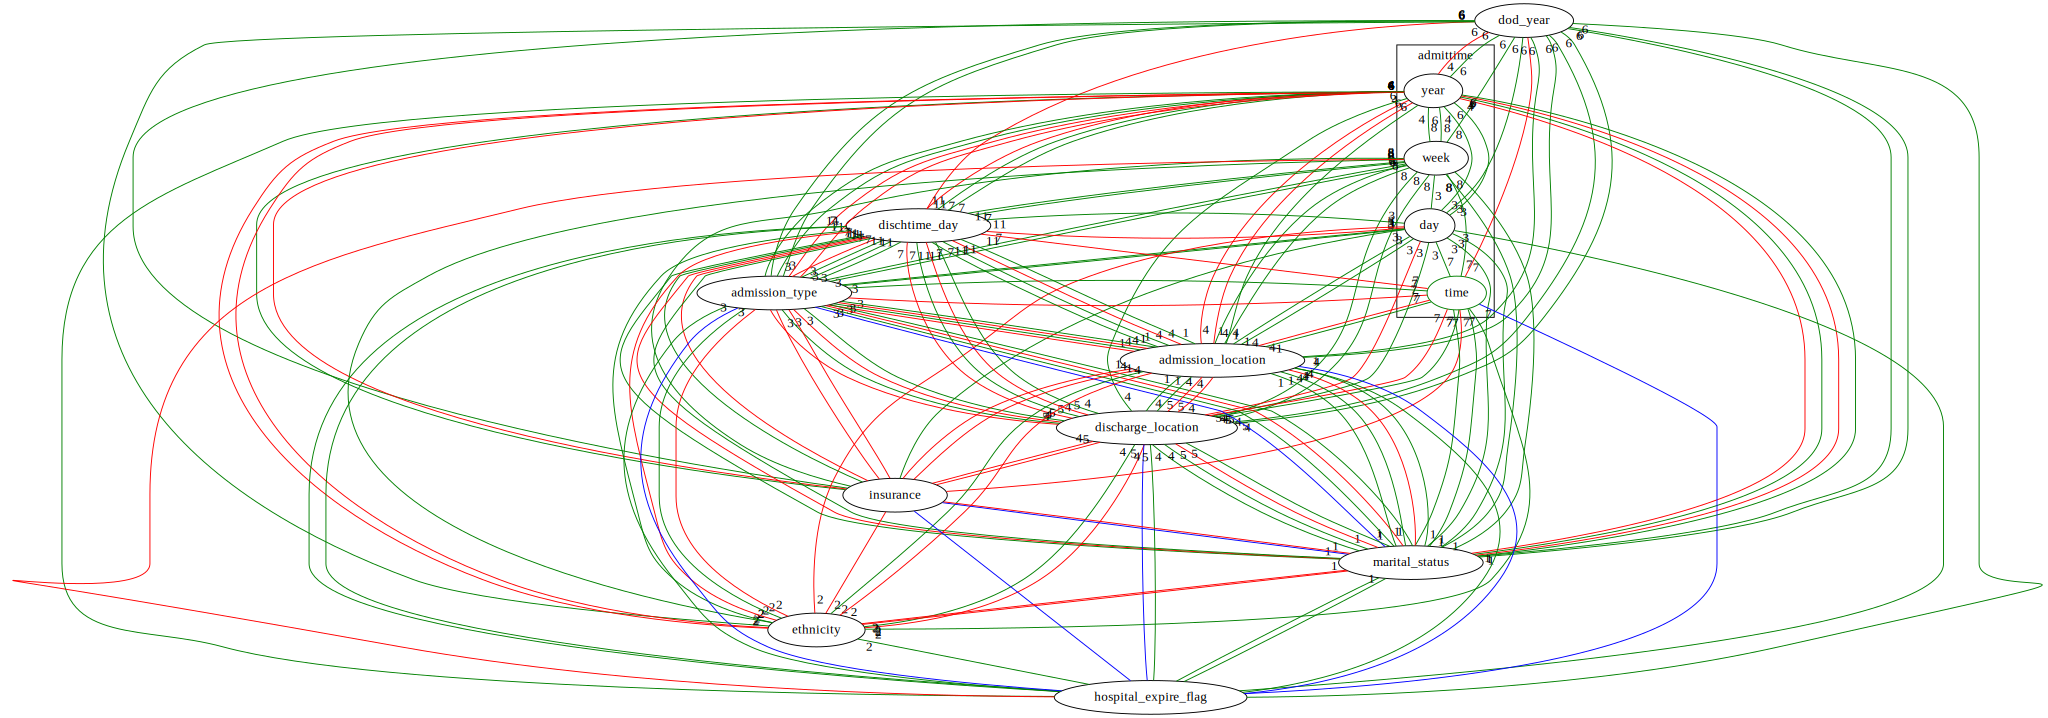

INFO     Removing node `admittime.admittime_year[4]` with cost: 15_552_000                                                   base.py:98


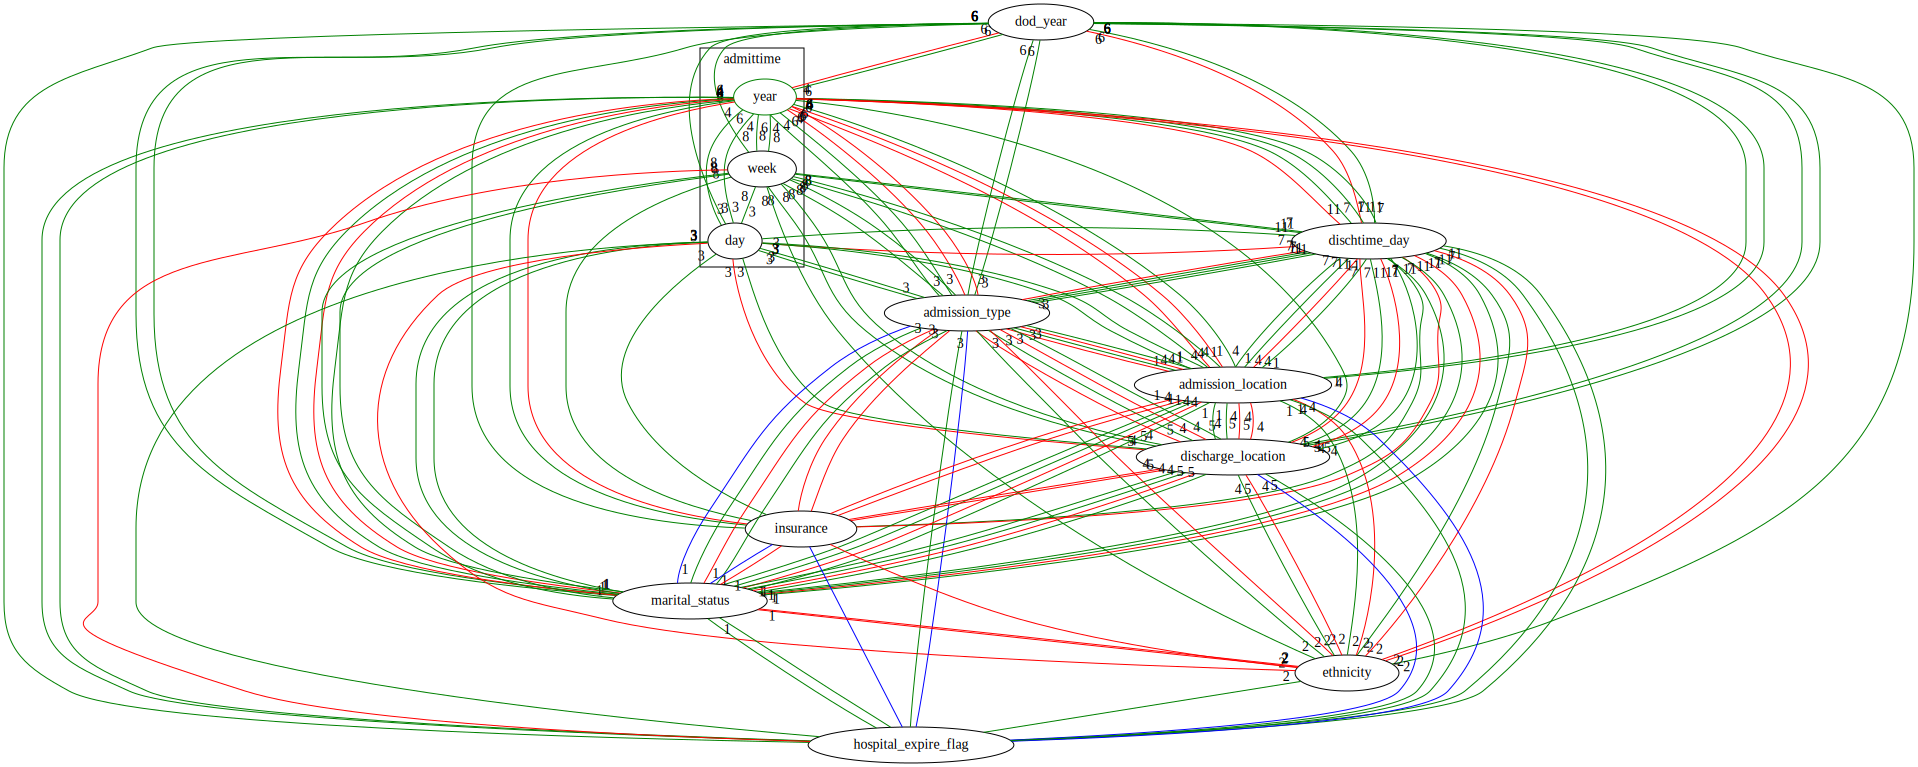

INFO     Removing node `discharge_location.discharge_location[5]` with cost: 20_736_000                                      base.py:98


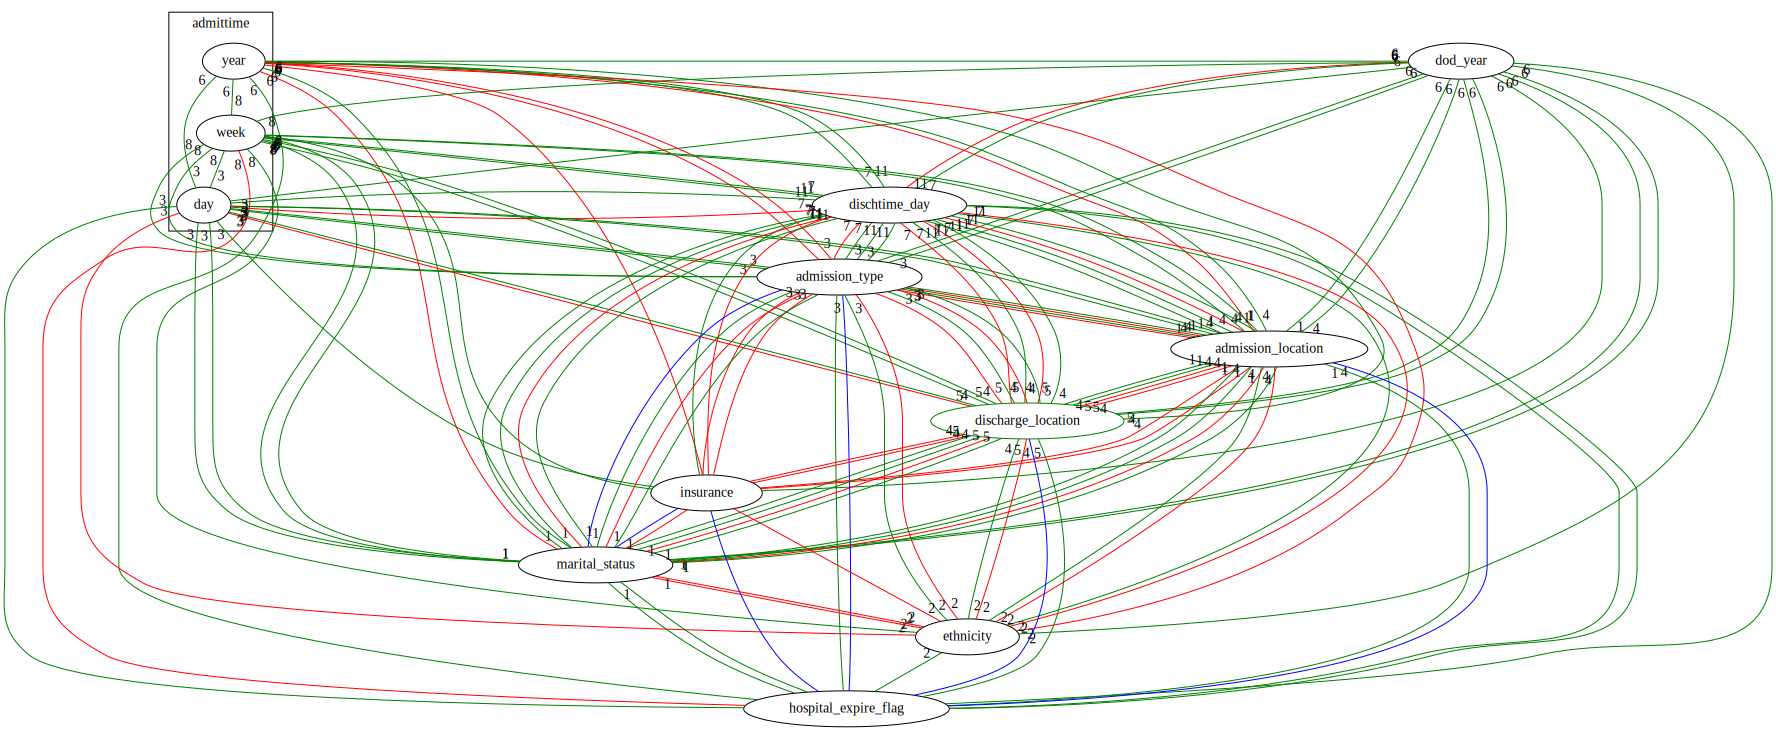

INFO     Removing node `dod.dod_year[6]` with cost: 103_680_000                                                              base.py:98


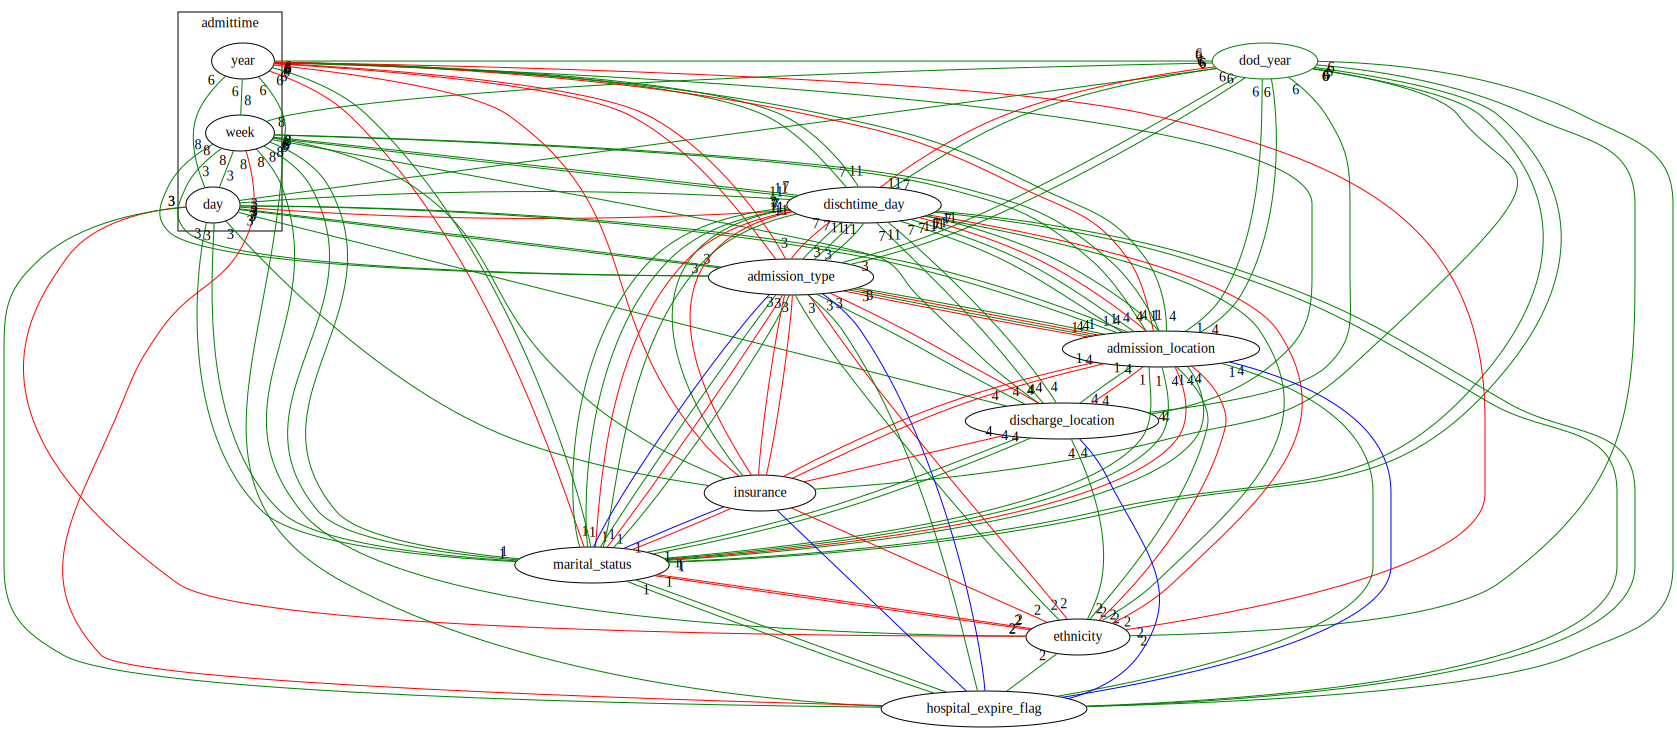

INFO     Removing node `admittime.admittime_year[6]` with cost: 20_736_000                                                   base.py:98


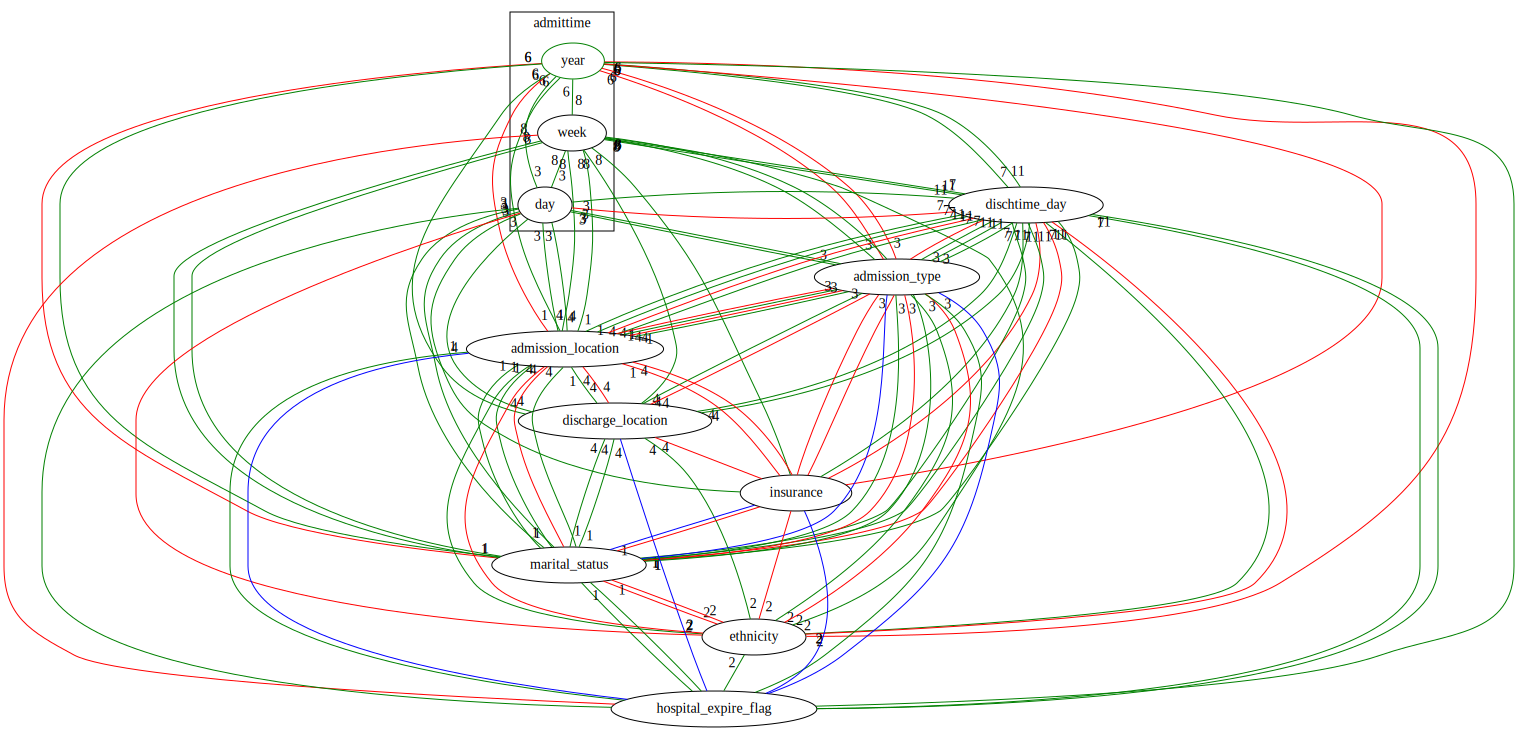

INFO     Removing node `admittime.admittime_week[8]` with cost: 4_147_200                                                    base.py:98


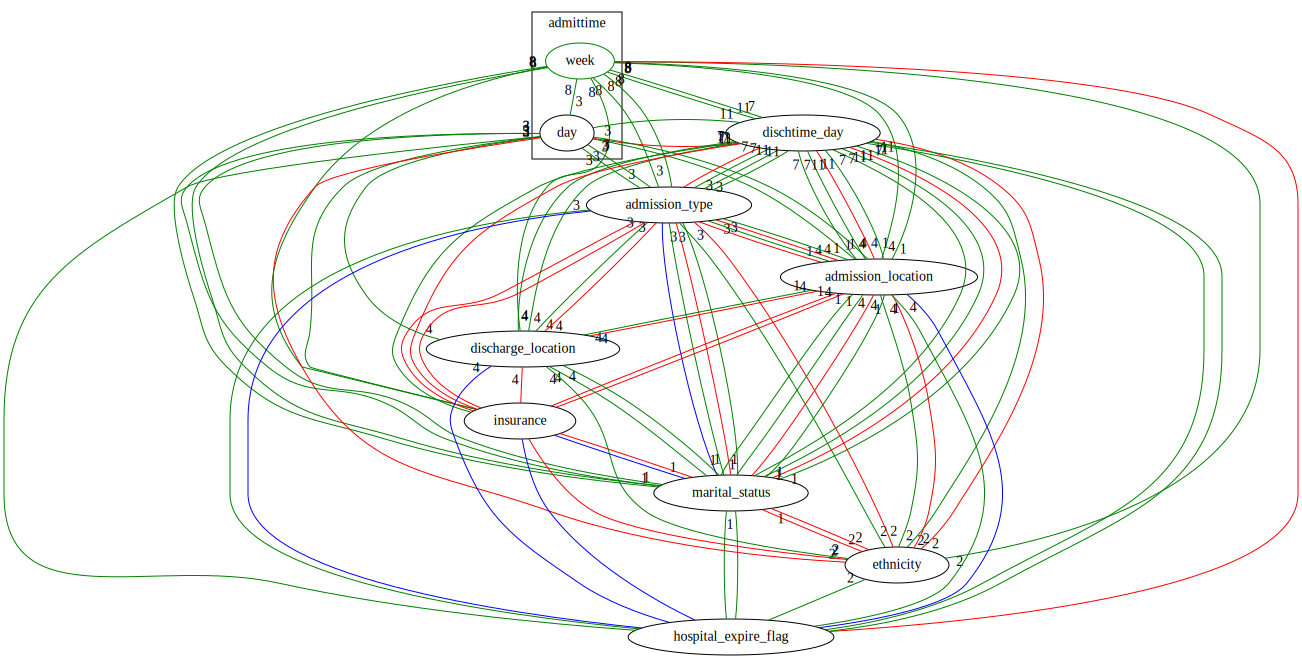

INFO     Removing node `admittime.admittime_day[3]` with cost: 829_440                                                       base.py:98


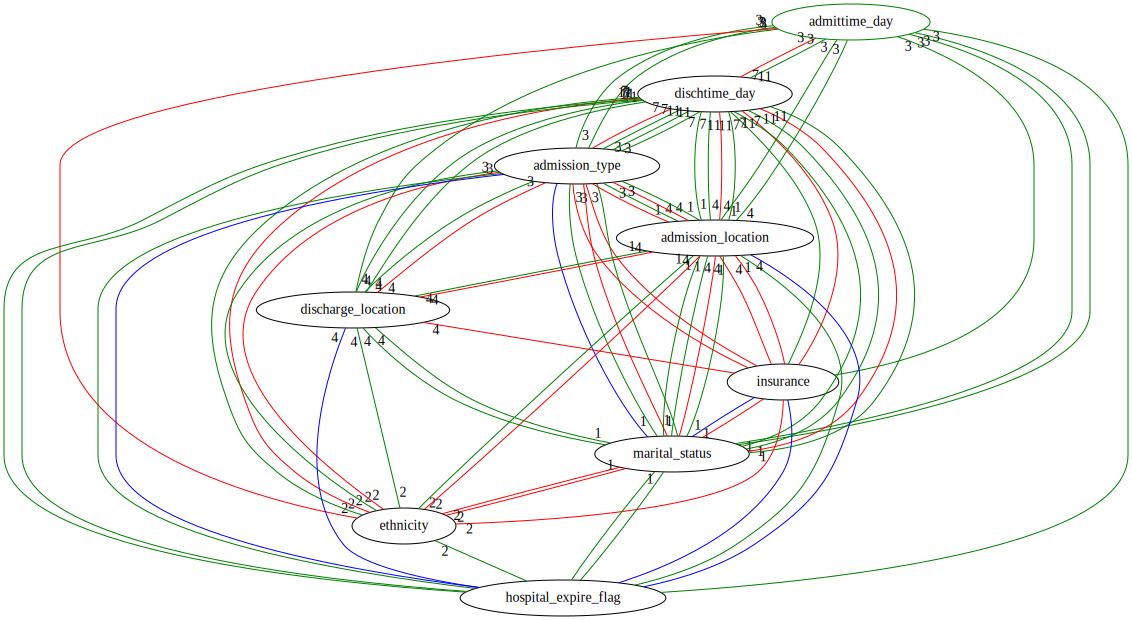

INFO     Removing node `dischtime.dischtime_day[7]` with cost: 414_720                                                       base.py:98


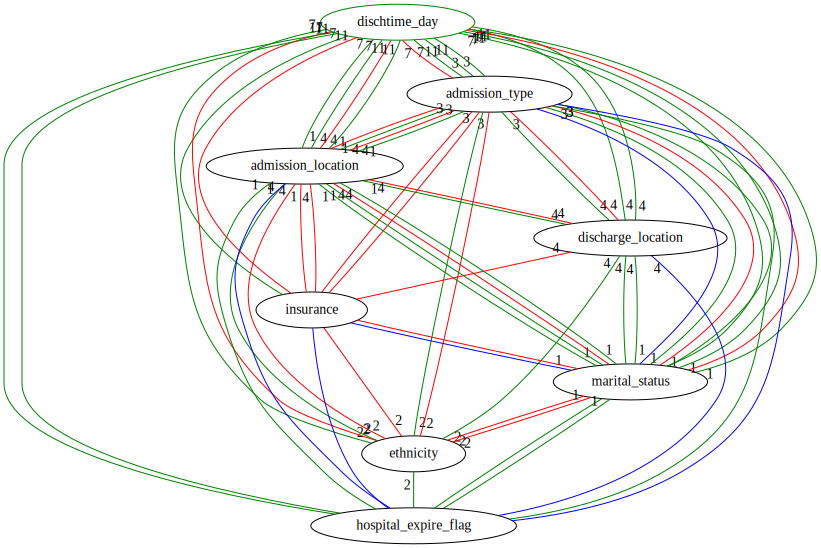

INFO     Removing node `dischtime.dischtime_day[11]` with cost: 69_120                                                       base.py:98


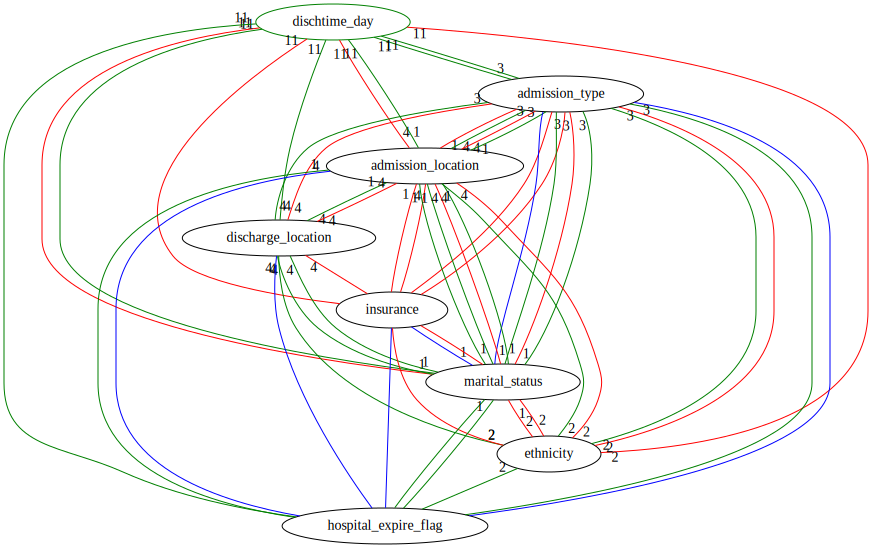

INFO     Removing node `admission_type.admission_type[0]` with cost: 34_560                                                  base.py:98


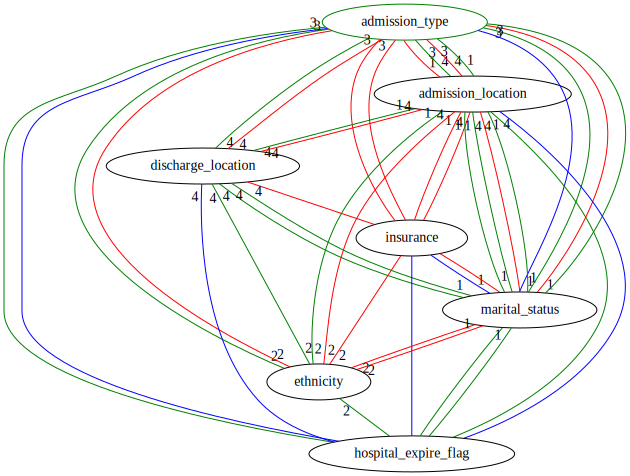

INFO     Removing node `admission_type.admission_type[3]` with cost: 15_360                                                  base.py:98


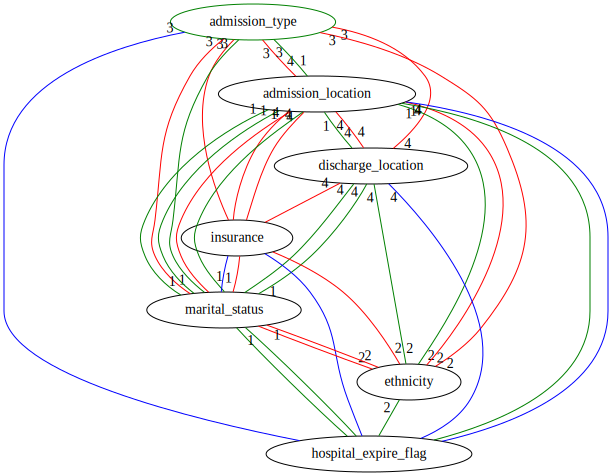

INFO     Removing node `admission_location.admission_location[1]` with cost: 3_840                                           base.py:98


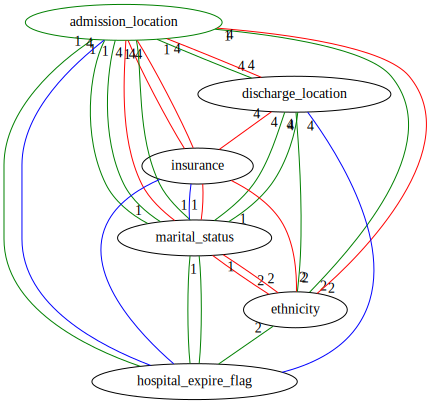

INFO     Removing node `admission_location.admission_location[4]` with cost: 960                                             base.py:98


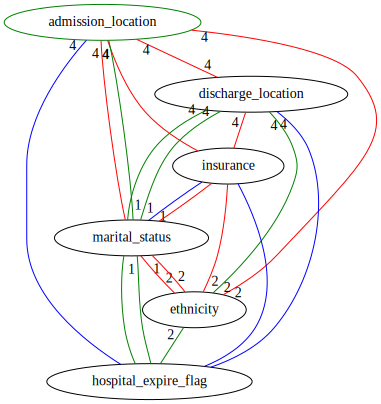

INFO     Removing node `discharge_location.discharge_location[4]` with cost: 480                                             base.py:98


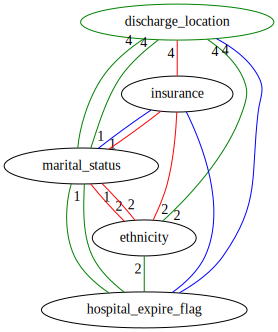

INFO     Removing node `insurance.insurance[0]` with cost: 120                                                               base.py:98


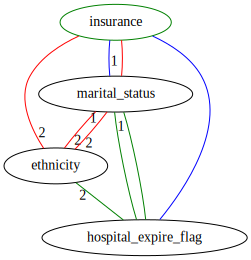

INFO     Removing node `marital_status.marital_status[0]` with cost: 40                                                      base.py:98


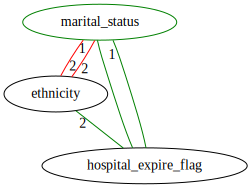

INFO     Removing node `marital_status.marital_status[1]` with cost: 32                                                      base.py:98


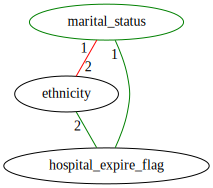

INFO     Removing node `ethnicity.ethnicity[2]` with cost: 8                                                                 base.py:98


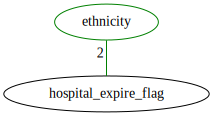

INFO     Removing node `hospital_expire_flag.hospital_expire_flag[0]` with cost: 2                                           base.py:98


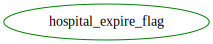

INFO     Final cordal graph with cost 181575165:                                                                            base.py:105


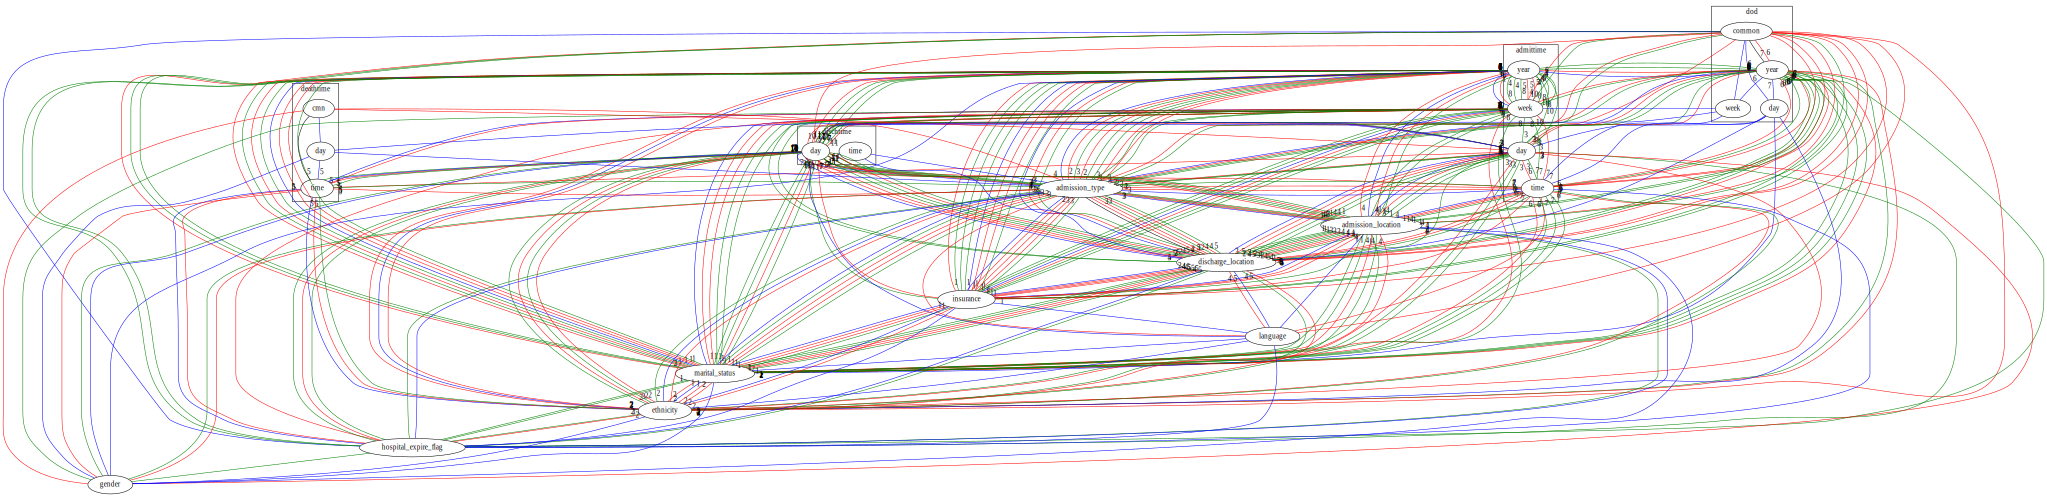

INFO     Elimination order:                                                                                                 base.py:107
         ['dischtime.dischtime_day[0]', 'admission_location.admission_location[0]', 'admittime.admittime_year[0]',                     
         'dod.dod_week[0]', 'admittime.admittime_week[10]', 'admittime.admittime_day[0]',                                              
         'discharge_location.discharge_location[3]', 'admission_location.admission_location[3]',                                       
         'admittime.admittime_time[0]', 'dischtime.dischtime_time[0]', 'discharge_location.discharge_location[0]',                     
         'ethnicity.ethnicity[0]', 'dod.dod_year[0]', 'deathtime.deathtime_time[0]', 'ethnicity.ethnicity[3]',                         
         'deathtime.deathtime_cmn[0]', 'deathtime.deathtime_day[0]', 'admission_type.admission_type[4]',                               
         'dischtime.dischtime_day[10]', 'dod.dod


(
    [
        'dischtime.dischtime_day[0]',
        'admission_location.admission_location[0]',
        'admittime.admittime_year[0]',
        'dod.dod_week[0]',
        'admittime.admittime_week[10]',
        'admittime.admittime_day[0]',
        'discharge_location.discharge_location[3]',
        'admission_location.admission_location[3]',
        'admittime.admittime_time[0]',
        'dischtime.dischtime_time[0]',
        'discharge_location.discharge_location[0]',
        'ethnicity.ethnicity[0]',
        'dod.dod_year[0]',
        'deathtime.deathtime_time[0]',
        'ethnicity.ethnicity[3]',
        'deathtime.deathtime_cmn[0]',
        'deathtime.deathtime_day[0]',
        'admission_type.admission_type[4]',
        'dischtime.dischtime_day[10]',
        'dod.dod_day[0]',
        'dod.dod_year[7]',
        'marital_status.marital_status[2]',
        'admittime.admittime_week[4]',
        'admittime.admittime_year[5]',
        'admission_type.admission_type[2]',
        'ad

In [ ]:
elimination_order_greedy(to_moral(g), m.table_attrs, display=True)